In [1]:
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('solarizedd', -T, -N,-kl)

# Project 2: Supervised Learning
## Question 2-Classification Task
# Contents of this Notebook and the sections where each answer has been answered:
### 1. Data Description (Question 1 answered)

### 2. In Depth Data Analysis (Question 1 answered)

### 3. Data Transformation

### 4. Feature Engineering
#### 4.1 Chi Squared Feature Selection
##### 4.1.1 Relevant features according to Chi square feature selection method
##### 4.1.2 Histograms of Chi2 Features selected (Question 2 answered)
#### 4.2 Mutual Information Feature selection
##### 4.2.1 Relevant features according to mutual information feature selection method
##### 4.2.1 Histograms of Mutual Information Features selected (Question 2 answered)

### 5. Building Functions for easy model creation and summary extraction (Question 3 answered)
#### 5.1 Fitting a logistic regression (LR) model with all features included
####  5.2 Fitting a LR model using Chi-Square features
####  5.3 Fitting a LR model using Mutual Information features 
####  5.4 Fitting a Decision Tree (DT) model with all features included
####  5.5 Fitting a DT model using Chi-Square features
####  5.6 Fitting a DT model using Mutual Information features 
####  5.7 Fitting a Random Forest (RF) model with all features included
####  5.8 Fitting a RF model using Chi-Square features
####  5.9 Fitting a RF model using Mutual Information features 
####  5.10 Fitting a Support Vector Classifier (SVC) model to the one hot encoding with Chi square features included
####  5.11 Fitting a Neural Network (NN) to the one hot encoding model with Chi squaure features
####  5.12 Fitting a NN with all features included
####  5.13 Fitting a NN with Chi square features included
####  5.14 Fitting a NN with Mutual Information features included
####  5.15 Fitting a Naive Bayes (NB) model with all features included
####  5.16 Fitting a NB model with Chi square features included
####  5.17 Fitting a NB model with Mutual Information features included

### 6. Cross fold validation and Boxplots of accuracy to measure error rate (Question 4 and 6 answered)
####  6.1 Models with all features included
####  6.2 Models with Chi Square Features included
####  6.3 Models with Mutual Information Features included
####  6.4 Models that used one hot encoding

### 7. Choosing top three algorithms and sumarizing accuracy score, confusion matrix, and classification report for each (Question 5 answered)

### 8. Creating the dataframe with 10 random instances for the features selected by Mutual Information method. (Question 7 answered)
####  8.1 Encoding newly created 10 instance random dataframe
####  8.2 Making prediction on the 10 instance random dataframe


In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from random import choice
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import model_selection
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.rcParams.update(plt.rcParamsDefault)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [5]:
# Importing the data file

df1 = pd.read_csv(r"C:\Users\Abdul Najeeb\Desktop\MS Stuff\Fourth Semester\6910 Python ML\Projects\Project 2\survey.csv")

1. Create a statistical summary of the data set.

# Data Description

In [6]:
# Analysis the data and each of the features. 
df1.head()
df1.tail()
df1.describe()
print("Shape of the dataset (rows, columns)")
df1.shape

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2/1/2016 23:04,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


Shape of the dataset (rows, columns)


(1259, 27)

In [7]:
print("NA values present in each column of the dataset:")
df1.isna().sum()

NA values present in each column of the dataset:


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [8]:
print("Information of what type of data is stored in each column:\n")
df1.info()
print("\n\nAlmost all of the columns seem to be object type.\n")

Information of what type of data is stored in each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  car

# In Depth Data Analysis

In [9]:
# In depth analysis of each columns in the data set
print("Statistical summary of the dataset.\n")
for i in df1:
    print("\n\nColumn Name: " + i)
    print("Total number of Unique values: " + str(df1[i].nunique()))
    print("Total number of na values: " + str(df1[i].isna().sum()))
    print("Mode:\n" + str(df1[i].mode()))
    print("\nUnique values:")
    df1[i].unique()
    print("Count of each unique value in the column:")
    df1[i].value_counts()
    




Statistical summary of the dataset.



Column Name: Timestamp
Total number of Unique values: 884
Total number of na values: 0
Mode:
0    8/27/2014 12:31
1    8/27/2014 15:23
2    8/27/2014 15:24
dtype: object

Unique values:


array(['8/27/2014 11:29', '8/27/2014 11:30', '8/27/2014 11:31',
       '8/27/2014 11:32', '8/27/2014 11:33', '8/27/2014 11:34',
       '8/27/2014 11:35', '8/27/2014 11:36', '8/27/2014 11:37',
       '8/27/2014 11:38', '8/27/2014 11:39', '8/27/2014 11:40',
       '8/27/2014 11:41', '8/27/2014 11:42', '8/27/2014 11:43',
       '8/27/2014 11:44', '8/27/2014 11:45', '8/27/2014 11:46',
       '8/27/2014 11:47', '8/27/2014 11:48', '8/27/2014 11:49',
       '8/27/2014 11:50', '8/27/2014 11:51', '8/27/2014 11:52',
       '8/27/2014 11:53', '8/27/2014 11:54', '8/27/2014 11:56',
       '8/27/2014 11:57', '8/27/2014 11:59', '8/27/2014 12:00',
       '8/27/2014 12:01', '8/27/2014 12:02', '8/27/2014 12:03',
       '8/27/2014 12:05', '8/27/2014 12:07', '8/27/2014 12:10',
       '8/27/2014 12:11', '8/27/2014 12:12', '8/27/2014 12:13',
       '8/27/2014 12:14', '8/27/2014 12:15', '8/27/2014 12:16',
       '8/27/2014 12:17', '8/27/2014 12:18', '8/27/2014 12:19',
       '8/27/2014 12:20', '8/27/2014 12:

Count of each unique value in the column:


8/27/2014 12:31    8
8/27/2014 15:23    8
8/27/2014 15:24    8
8/27/2014 11:43    7
8/27/2014 12:34    6
                  ..
2/21/2015 6:06     1
8/30/2014 20:43    1
6/25/2015 12:24    1
2/21/2015 9:19     1
8/29/2014 9:46     1
Name: Timestamp, Length: 884, dtype: int64



Column Name: Age
Total number of Unique values: 53
Total number of na values: 0
Mode:
0    29
dtype: int64

Unique values:


array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

Count of each unique value in the column:


 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          



Column Name: Gender
Total number of Unique values: 49
Total number of na values: 0
Mode:
0    Male
dtype: object

Unique values:


array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Count of each unique value in the column:


Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Nah                                                 1
something kinda male?                               1
non-binary                                          1
male leaning androgynous    



Column Name: Country
Total number of Unique values: 48
Total number of na values: 0
Mode:
0    United States
dtype: object

Unique values:


array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

Count of each unique value in the column:


United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Italy                       7
Sweden                      7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Bulgaria                    4
Singapore                   4
Finland                     3
Mexico                      3
Russia                      3
Austria                     3
Colombia                    2
Greece                      2
Croatia                     2
Denmark                     2
Portugal                    2
Czech Republic              1
Slovenia                    1
Norway                      1
Georgia                     1
Uruguay   



Column Name: state
Total number of Unique values: 45
Total number of na values: 515
Mode:
0    CA
dtype: object

Unique values:


array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

Count of each unique value in the column:


CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
OR     29
IL     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
GA     12
WI     12
MO     12
UT     11
CO      9
AL      8
MD      8
AZ      7
NJ      6
OK      6
SC      5
KY      5
CT      4
DC      4
IA      4
KS      3
VT      3
NV      3
SD      3
NH      3
NM      2
WY      2
NE      2
ME      1
ID      1
LA      1
WV      1
MS      1
RI      1
Name: state, dtype: int64



Column Name: self_employed
Total number of Unique values: 2
Total number of na values: 18
Mode:
0    No
dtype: object

Unique values:


array([nan, 'Yes', 'No'], dtype=object)

Count of each unique value in the column:


No     1095
Yes     146
Name: self_employed, dtype: int64



Column Name: family_history
Total number of Unique values: 2
Total number of na values: 0
Mode:
0    No
dtype: object

Unique values:


array(['No', 'Yes'], dtype=object)

Count of each unique value in the column:


No     767
Yes    492
Name: family_history, dtype: int64



Column Name: treatment
Total number of Unique values: 2
Total number of na values: 0
Mode:
0    Yes
dtype: object

Unique values:


array(['Yes', 'No'], dtype=object)

Count of each unique value in the column:


Yes    637
No     622
Name: treatment, dtype: int64



Column Name: work_interfere
Total number of Unique values: 4
Total number of na values: 264
Mode:
0    Sometimes
dtype: object

Unique values:


array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

Count of each unique value in the column:


Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64



Column Name: no_employees
Total number of Unique values: 6
Total number of na values: 0
Mode:
0    25-Jun
dtype: object

Unique values:


array(['25-Jun', 'More than 1000', '26-100', '100-500', '5-Jan',
       '500-1000'], dtype=object)

Count of each unique value in the column:


25-Jun            290
26-100            289
More than 1000    282
100-500           176
5-Jan             162
500-1000           60
Name: no_employees, dtype: int64



Column Name: remote_work
Total number of Unique values: 2
Total number of na values: 0
Mode:
0    No
dtype: object

Unique values:


array(['No', 'Yes'], dtype=object)

Count of each unique value in the column:


No     883
Yes    376
Name: remote_work, dtype: int64



Column Name: tech_company
Total number of Unique values: 2
Total number of na values: 0
Mode:
0    Yes
dtype: object

Unique values:


array(['Yes', 'No'], dtype=object)

Count of each unique value in the column:


Yes    1031
No      228
Name: tech_company, dtype: int64



Column Name: benefits
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    Yes
dtype: object

Unique values:


array(['Yes', "Don't know", 'No'], dtype=object)

Count of each unique value in the column:


Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64



Column Name: care_options
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    No
dtype: object

Unique values:


array(['Not sure', 'No', 'Yes'], dtype=object)

Count of each unique value in the column:


No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64



Column Name: wellness_program
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    No
dtype: object

Unique values:


array(['No', "Don't know", 'Yes'], dtype=object)

Count of each unique value in the column:


No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64



Column Name: seek_help
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    No
dtype: object

Unique values:


array(['Yes', "Don't know", 'No'], dtype=object)

Count of each unique value in the column:


No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64



Column Name: anonymity
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    Don't know
dtype: object

Unique values:


array(['Yes', "Don't know", 'No'], dtype=object)

Count of each unique value in the column:


Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64



Column Name: leave
Total number of Unique values: 5
Total number of na values: 0
Mode:
0    Don't know
dtype: object

Unique values:


array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

Count of each unique value in the column:


Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64



Column Name: mental_health_consequence
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    No
dtype: object

Unique values:


array(['No', 'Maybe', 'Yes'], dtype=object)

Count of each unique value in the column:


No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64



Column Name: phys_health_consequence
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    No
dtype: object

Unique values:


array(['No', 'Yes', 'Maybe'], dtype=object)

Count of each unique value in the column:


No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64



Column Name: coworkers
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    Some of them
dtype: object

Unique values:


array(['Some of them', 'No', 'Yes'], dtype=object)

Count of each unique value in the column:


Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64



Column Name: supervisor
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    Yes
dtype: object

Unique values:


array(['Yes', 'No', 'Some of them'], dtype=object)

Count of each unique value in the column:


Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64



Column Name: mental_health_interview
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    No
dtype: object

Unique values:


array(['No', 'Yes', 'Maybe'], dtype=object)

Count of each unique value in the column:


No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64



Column Name: phys_health_interview
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    Maybe
dtype: object

Unique values:


array(['Maybe', 'No', 'Yes'], dtype=object)

Count of each unique value in the column:


Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64



Column Name: mental_vs_physical
Total number of Unique values: 3
Total number of na values: 0
Mode:
0    Don't know
dtype: object

Unique values:


array(['Yes', "Don't know", 'No'], dtype=object)

Count of each unique value in the column:


Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64



Column Name: obs_consequence
Total number of Unique values: 2
Total number of na values: 0
Mode:
0    No
dtype: object

Unique values:


array(['No', 'Yes'], dtype=object)

Count of each unique value in the column:


No     1075
Yes     184
Name: obs_consequence, dtype: int64



Column Name: comments
Total number of Unique values: 160
Total number of na values: 1095
Mode:
0    * Small family business - YMMV.
dtype: object

Unique values:


array([nan,
       "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.",
       'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. ',
       "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work.",
       'Relatively new job. Ask again later',
       'Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better',
       'I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers who ranged from ambivalent to indifferent to actively hostile regarding mental he

Count of each unique value in the column:


* Small family business - YMMV.                                                                                                                                                                                                                                                                                                                                  5
I mostly suffer from social anxiety which keeps me from attending conferences. In my small dev group a big problem is a supervisor who's a workaholic and will never say no when asked to do something so he's doing the job of at least two ppl (poorly) and working crazy hours setting the tone for the test of us that work/life balance isn't important.    1
A lot of these answers aren't really applicable since I'm self employed as a sole proprietor.                                                                                                                                                                                                     

In [10]:
# NOTES ON WHAT NEEDS TO BE FIXED IN EACH COLUMN
## timestamp: drop timestamp for analysis
## age: remove negative values, remove 9999999 remove values above 100
## gender: classify all of them as either male or female
## country: fix "bahamas, the" and remove georgia and put united states in it's place
## state: no need to fix it has many NA values so it will be dropped.
## self_employed: drop rows that have NA values of self employed
## work_interfere: drop nan vavlues and check model validity or else distribute randomly based on distribution
## benifits: Distribute yes or no evenly in Don't know
## care_options: Distribute yes or no evenly in Not sure
## wellness_program: Distribute yes or no evenly in Don't know
## seek_help: Distribute yes or no evenly in Don't know
## anonymity: Drop the column for use in the model 
## mental_health_consequence: distribute yes or no evenly in maybe
## phys_health_consequence: distribute yes or no evenly in maybe
## mental_health_interview: distribute yes or no evenly in Maybe
## phys_helth_interview: distribute yes or no evenly in Maybe
## mentail_vs_physical: distribute yes or no evenly in Don't know
## comments: drop comments completely for model processing

# Data Transformation

In [11]:
# Fixing all the columns and creating a new dataframe according to the new values
# Making a copy of df1 and storing in df2
df2  = df1.copy()

# Dropping the columns that are not required for this analysis
df2 = df2.drop(['Timestamp', 'anonymity', 'comments', 'state', 'Country'], axis = 1)


In [12]:
# Removing rows with NA values
## self_employed: drop rows that have NA values of self employed
## work_interfere: drop nan vavlues and check model validity or else distribute randomly based on distribution

df2 = df2.dropna(how='any', subset=['self_employed', 'work_interfere'])
df2 = df2.reset_index(drop = True)

In [13]:
# Transforming age column
## age: remove negative values, remove 9999999 remove values above 100
df2['Age'] = df2['Age'].abs()
df2.loc[df2['Age'] == 1726, 'Age'] = 26
df2.loc[df2['Age'] == 329, 'Age'] = 29
age  = df2.loc[df2['Age'] < 99, 'Age']
print("Age Mean:")
age.mean()

# changing the outliers with the mean of the age column. 
df2.loc[df2['Age'] == 99999999999, 'Age'] = 32
df2.loc[df2['Age'] < 18, 'Age'] = 32

df2['Age'].unique()


Age Mean:


32.21823770491803

array([46, 29, 31, 41, 33, 35, 34, 37, 32, 30, 42, 40, 27, 24, 18, 38, 26,
       22, 44, 23, 36, 28, 39, 25, 45, 21, 19, 43, 56, 54, 55, 57, 58, 48,
       47, 62, 51, 50, 49, 20, 53, 61, 72, 60], dtype=int64)

In [14]:
# Transforming gender column
## gender: classify all of them as either male or female

df2['Gender'].unique()
male = ['M', 'Male','male','m','Male-ish','maile','something kinda male?','Cis Male','Mal','Male (CIS)', 'Make', 'Guy (-ish) ^_^',
        'male leaning androgynous', 'Male ', 'Man', 'msle', 'Mail', 'cis male',
        'Malr', 'Cis Man', 'ostensibly male, unsure what that really means']

female = ['Female',  'female',  'Cis Female', 'F',  'Woman', 'f', 'non-binary', 'Femake', 'woman', 
        'Female ',  'cis-female/femme',  'Female (cis)',  'p', 'femail',]
binary_trans = [ 
       'Trans-female',  'queer/she/they', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer',  'Androgyne', 'Agender', 'Trans woman','Neuter', 'Female (trans)',
       'queer', 'A little about you']


# Replacing all gender values to either male, female or binary_trans
for i in male:
    df2.loc[df2['Gender'] == i, 'Gender'] = "male"
for i in female:
    df2.loc[df2['Gender'] == i, 'Gender'] = "female"
for i in binary_trans:
    df2.loc[df2['Gender'] == i, 'Gender'] = "binary_trans"
    
# Transformed Gender column
df2['Gender'].unique()


array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'f', 'Mal',
       'queer/she/they', 'non-binary', 'woman', 'Make', 'Nah', 'All',
       'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

array(['male', 'female', 'binary_trans'], dtype=object)

In [15]:
# Fixing benefits columns
## benifits: Distribute yes or no evenly in Don't know

df2['benefits'].unique()
df2['benefits'].value_counts()

for idx, i in enumerate(df2['benefits']):
    if i == "Don't know":
        df2['benefits'][idx] = str(np.random.choice(["Yes", "No"], 1, p=[399/(399+291), 291/(399+291)]))
df2.loc[df2['benefits'] == "['No']", 'benefits'] = 'No'
df2.loc[df2['benefits'] == "['Yes']", 'benefits'] = 'Yes'

df2['benefits'].unique()
df2['benefits'].value_counts()


array(['Yes', 'No', "Don't know"], dtype=object)

Yes           399
No            291
Don't know    287
Name: benefits, dtype: int64

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array(['Yes', 'No'], dtype=object)

Yes    550
No     427
Name: benefits, dtype: int64

In [16]:
# Fixing care_options column
## care_options: Distribute yes or no evenly in Not sure

df2['care_options'].unique()
df2['care_options'].value_counts()

for idx, i in enumerate(df2['care_options']):
    if i == "Not sure":
        df2['care_options'][idx] = str(np.random.choice(["Yes", "No"], 1, p=[388/(388+364), 364/(388+364)]))
df2.loc[df2['care_options'] == "['No']", 'care_options'] = "No"
df2.loc[df2['care_options'] == "['Yes']", 'care_options'] = "Yes"

df2['care_options'].unique()
df2['care_options'].value_counts()


array(['Not sure', 'Yes', 'No'], dtype=object)

Yes         388
No          364
Not sure    225
Name: care_options, dtype: int64

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array(['No', 'Yes'], dtype=object)

Yes    501
No     476
Name: care_options, dtype: int64

In [17]:
# Fixing wellness_program columns
## wellness_program: Distribute yes or no evenly in Don't know
df2['wellness_program'].unique()
df2['wellness_program'].value_counts()

for idx, i in enumerate(df2['wellness_program']):
    if i == "Don't know":
        df2['wellness_program'][idx] = str(np.random.choice(["Yes", "No"], 1, p=[195/(195+651), 651/(195+651)]))
df2.loc[df2['wellness_program'] == "['No']", 'wellness_program'] = "No"
df2.loc[df2['wellness_program'] == "['Yes']", 'wellness_program'] = "Yes"

df2['wellness_program'].unique()
df2['wellness_program'].value_counts()

array(['Yes', 'No', "Don't know"], dtype=object)

No            651
Yes           195
Don't know    131
Name: wellness_program, dtype: int64

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['Yes', 'No'], dtype=object)

No     751
Yes    226
Name: wellness_program, dtype: int64

In [18]:
#Fixing seek_help column
## seek_help: Distribute yes or no evenly in Don't know
df2['seek_help'].unique()
df2['seek_help'].value_counts()

for idx, i in enumerate(df2['seek_help']):
    if i == "Don't know":
        df2['seek_help'][idx] = str(np.random.choice(["Yes", "No"], 1, p=[211/(211+500), 500/(211+500)]))
df2.loc[df2['seek_help'] == "['No']", 'seek_help'] = "No"
df2.loc[df2['seek_help'] == "['Yes']", 'seek_help'] = "Yes"

df2['seek_help'].unique()
df2['seek_help'].value_counts()

array(["Don't know", 'No', 'Yes'], dtype=object)

No            500
Don't know    266
Yes           211
Name: seek_help, dtype: int64

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['No', 'Yes'], dtype=object)

No     687
Yes    290
Name: seek_help, dtype: int64

In [19]:
#Fixing mental_health_consequence column
## mental_health_consequence: distribute yes or no evenly in maybe

df2['mental_health_consequence'].unique()
df2['mental_health_consequence'].value_counts()

for idx, i in enumerate(df2['mental_health_consequence']):
    if i == "Maybe":
        df2['mental_health_consequence'][idx] = str(np.random.choice(["Yes", "No"], 1, p=[258/(258+343), 343/(258+343)]))
df2.loc[df2['mental_health_consequence'] == "['No']", 'mental_health_consequence'] = "No"
df2.loc[df2['mental_health_consequence'] == "['Yes']", 'mental_health_consequence'] = "Yes"

df2['mental_health_consequence'].unique()
df2['mental_health_consequence'].value_counts()

array(['No', 'Maybe', 'Yes'], dtype=object)

Maybe    376
No       343
Yes      258
Name: mental_health_consequence, dtype: int64

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array(['No', 'Yes'], dtype=object)

No     550
Yes    427
Name: mental_health_consequence, dtype: int64

In [20]:
# Fixing phys_health_consequence column
## phys_health_consequence: distribute yes or no evenly in maybe

df2['phys_health_consequence'].unique()
df2['phys_health_consequence'].value_counts()

for idx, i in enumerate(df2['phys_health_consequence']):
    if i == "Maybe":
        df2['phys_health_consequence'][idx] = str(np.random.choice(["Yes", "No"], 1, p=[56/(56+700), 700/(56+700)]))
df2.loc[df2['phys_health_consequence'] == "['No']", 'phys_health_consequence'] = "No"
df2.loc[df2['phys_health_consequence'] == "['Yes']", 'phys_health_consequence'] = "Yes"

df2['phys_health_consequence'].unique()
df2['phys_health_consequence'].value_counts()

array(['No', 'Maybe', 'Yes'], dtype=object)

No       700
Maybe    221
Yes       56
Name: phys_health_consequence, dtype: int64

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array(['No', 'Yes'], dtype=object)

No     905
Yes     72
Name: phys_health_consequence, dtype: int64

In [21]:
# Fixing mentatl_health_interview column
## mental_health_interview: distribute yes or no evenly in Maybe
df2['mental_health_interview'].unique()
df2['mental_health_interview'].value_counts()

for idx, i in enumerate(df2['mental_health_interview']):
    if i == "Maybe":
        df2['mental_health_interview'][idx] = str(np.random.choice(["Yes", "No"], 1, p=[32/(32+801), 801/(32+801)]))
df2.loc[df2['mental_health_interview'] == "['No']", 'mental_health_interview'] = "No"
df2.loc[df2['mental_health_interview'] == "['Yes']", 'mental_health_interview'] = "Yes"

df2['mental_health_interview'].unique()
df2['mental_health_interview'].value_counts()

array(['No', 'Maybe', 'Yes'], dtype=object)

No       801
Maybe    144
Yes       32
Name: mental_health_interview, dtype: int64

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['No', 'Yes'], dtype=object)

No     934
Yes     43
Name: mental_health_interview, dtype: int64

In [22]:
#Fixing phys_health_interview column
# phys_health_interview: distribute yes or no evenly in Maybe

df2['phys_health_interview'].unique()
df2['phys_health_interview'].value_counts()


for idx, i in enumerate(df2['phys_health_interview']):
    if i == "Maybe":
        df2['phys_health_interview'][idx] = str(np.random.choice(["Yes", "No"], 1, p=[152/(152+388), 388/(152+388)]))
df2.loc[df2['phys_health_interview'] == "['No']", 'phys_health_interview'] = "No"
df2.loc[df2['phys_health_interview'] == "['Yes']", 'phys_health_interview'] = "Yes"

df2['phys_health_interview'].unique()
df2['phys_health_interview'].value_counts()

array(['Yes', 'No', 'Maybe'], dtype=object)

Maybe    437
No       388
Yes      152
Name: phys_health_interview, dtype: int64

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


array(['Yes', 'No'], dtype=object)

No     693
Yes    284
Name: phys_health_interview, dtype: int64

In [23]:
# Fixing mentail_vs_physical column
## mental_vs_physical: distribute yes or no evenly in Don't know
df2['mental_vs_physical'].unique()
df2['mental_vs_physical'].value_counts()


for idx, i in enumerate(df2['mental_vs_physical']):
    if i == "Don't know":
        df2['mental_vs_physical'][idx] = str(np.random.choice(["Yes", "No"], 1, p=[267/(267+282), 282/(267+282)]))
df2.loc[df2['mental_vs_physical'] == "['No']", 'mental_vs_physical'] = "No"
df2.loc[df2['mental_vs_physical'] == "['Yes']", 'mental_vs_physical'] = "Yes"

df2['mental_vs_physical'].unique()
df2['mental_vs_physical'].value_counts()

array(['Yes', 'No', "Don't know"], dtype=object)

Don't know    428
No            282
Yes           267
Name: mental_vs_physical, dtype: int64

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array(['Yes', 'No'], dtype=object)

No     496
Yes    481
Name: mental_vs_physical, dtype: int64

In [24]:
df2.shape
df2 = df2.reset_index(drop = True)
df2
df2['mental_health_consequence'].value_counts()
df2.to_csv("transformed_survey.csv", index = False)

(977, 22)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,seek_help,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,46,male,Yes,Yes,No,Sometimes,5-Jan,Yes,Yes,Yes,...,No,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
1,29,male,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,No,Somewhat difficult,Yes,No,Some of them,Some of them,No,No,No,No
2,31,male,Yes,No,No,Never,5-Jan,Yes,Yes,No,...,No,Somewhat difficult,No,No,Some of them,Some of them,No,No,Yes,No
3,46,male,No,No,Yes,Often,26-100,Yes,Yes,Yes,...,No,Don't know,No,No,Some of them,Yes,No,No,No,No
4,41,male,No,No,Yes,Never,More than 1000,No,No,No,...,No,Don't know,Yes,No,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,29,male,No,Yes,Yes,Sometimes,100-500,Yes,Yes,Yes,...,No,Don't know,Yes,No,Some of them,No,No,No,No,No
973,36,male,No,Yes,No,Rarely,More than 1000,No,No,Yes,...,Yes,Somewhat easy,No,Yes,Some of them,Some of them,No,No,No,No
974,32,male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,No,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
975,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,No,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


No     550
Yes    427
Name: mental_health_consequence, dtype: int64

# Feature Engineering

In [25]:
X = df2.drop('mental_health_consequence', axis = 1 )
y = df2['mental_health_consequence']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X['Age'] = scaler.fit_transform(X[['Age']])
X.columns


X = X.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


# prepare input data
X_train_enc = X_train
X_test_enc = X_test
le = LabelEncoder()
for i in X.columns:
    if i!= "Age":
        X_train_enc[i] = le.fit_transform(X_train[i])
        X_test_enc[i] = le.fit_transform(X_test[i])
        
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)






Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help', 'leave',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

Train (654, 21) (654,)
Test (323, 21) (323,)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2. Create an appropriate histogram for each of the features you consider relevant (at least 3).

## Chi Squared Feature Selection

SelectKBest(k='all', score_func=<function chi2 at 0x000001A6210A0048>)

Feature 0: 0.023949
Feature 1: 0.629066
Feature 2: 0.376197
Feature 3: 1.790210
Feature 4: 0.227475
Feature 5: 0.514345
Feature 6: 8.442309
Feature 7: 0.034015
Feature 8: 0.562280
Feature 9: 0.085814
Feature 10: 5.028640
Feature 11: 7.036929
Feature 12: 9.552504
Feature 13: 29.863660
Feature 14: 42.937826
Feature 15: 33.974059
Feature 16: 95.659778
Feature 17: 6.108560
Feature 18: 0.404879
Feature 19: 17.298654
Feature 20: 24.577164


<BarContainer object of 21 artists>

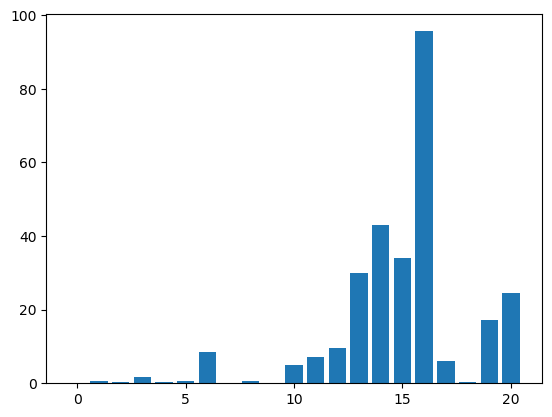

In [26]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Relevant features according to Chi square feature selection method

In [27]:

df2[['no_employees', 'care_options', 'wellness_program', 'seek_help', 'leave',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview','mental_vs_physical', 'obs_consequence']]





,no_employees,care_options,wellness_program,seek_help,leave,phys_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,5-Jan,No,Yes,No,Very easy,No,Yes,Yes,No,Yes,Yes
1,100-500,Yes,No,No,Somewhat difficult,No,Some of them,Some of them,No,No,No
2,5-Jan,No,No,No,Somewhat difficult,No,Some of them,Some of them,No,Yes,No
3,26-100,Yes,No,No,Don't know,No,Some of them,Yes,No,No,No
4,More than 1000,No,No,No,Don't know,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
972,100-500,Yes,Yes,No,Don't know,No,Some of them,No,No,No,No
973,More than 1000,No,Yes,Yes,Somewhat easy,Yes,Some of them,Some of them,No,No,No
974,26-100,Yes,No,No,Somewhat difficult,No,Some of them,Yes,No,Yes,No
975,More than 1000,Yes,No,No,Somewhat difficult,Yes,No,No,No,No,No


### Histograms of Chi2 Features selected

In [28]:
plt.figure(figsize=(8,8))
df2['leave'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [29]:

plt.figure(figsize=(8,8))
df2['no_employees'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [30]:

plt.figure(figsize=(8,8))
df2['care_options'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [31]:

plt.figure(figsize=(8,8))
df2['wellness_program'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [32]:

plt.figure(figsize=(8,8))
df2['seek_help'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [33]:
plt.figure(figsize=(8,8))
df2['phys_health_consequence'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [34]:
plt.figure(figsize=(8,8))
df2['coworkers'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [35]:
plt.figure(figsize=(8,8))
df2['supervisor'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [36]:
plt.figure(figsize=(8,8))
df2['mental_health_interview'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [37]:
plt.figure(figsize=(8,8))
df2['obs_consequence'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

## Mutual Information Feature selection

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x000001A6212DB0D8>)

Feature 0: 0.010651
Feature 1: 0.052297
Feature 2: 0.002956
Feature 3: 0.000000
Feature 4: 0.003942
Feature 5: 0.014439
Feature 6: 0.000000
Feature 7: 0.017636
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.010241
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.032223
Feature 14: 0.064889
Feature 15: 0.050720
Feature 16: 0.130763
Feature 17: 0.012564
Feature 18: 0.015962
Feature 19: 0.050494
Feature 20: 0.008055


<BarContainer object of 21 artists>

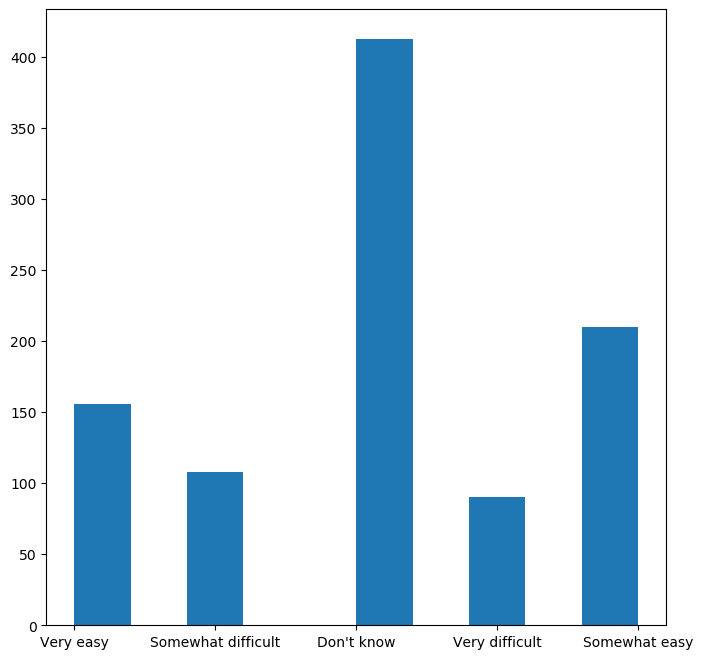

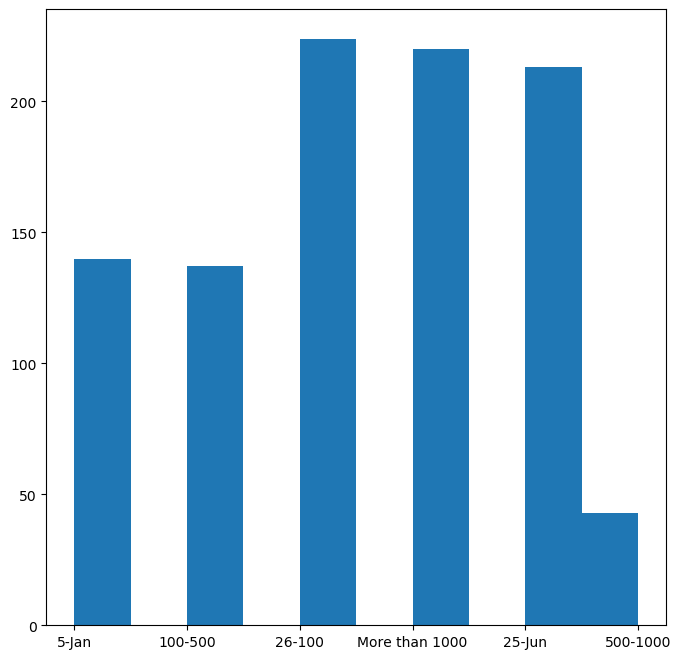

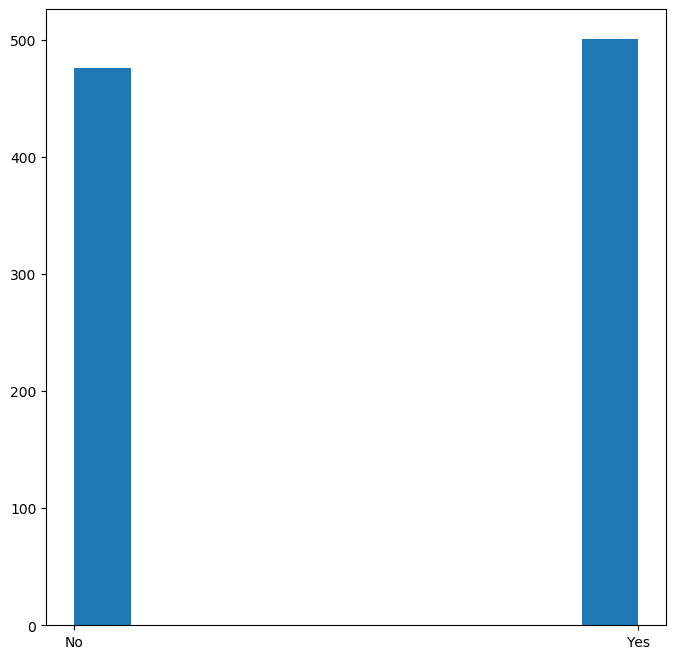

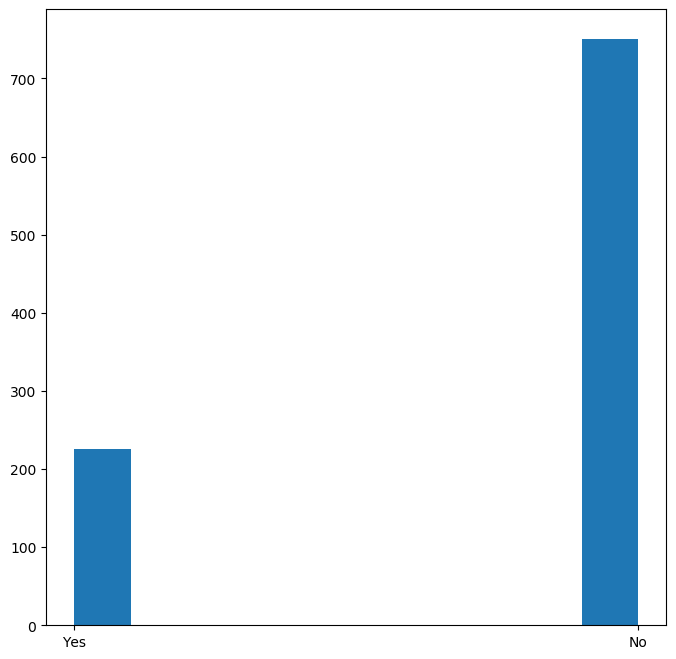

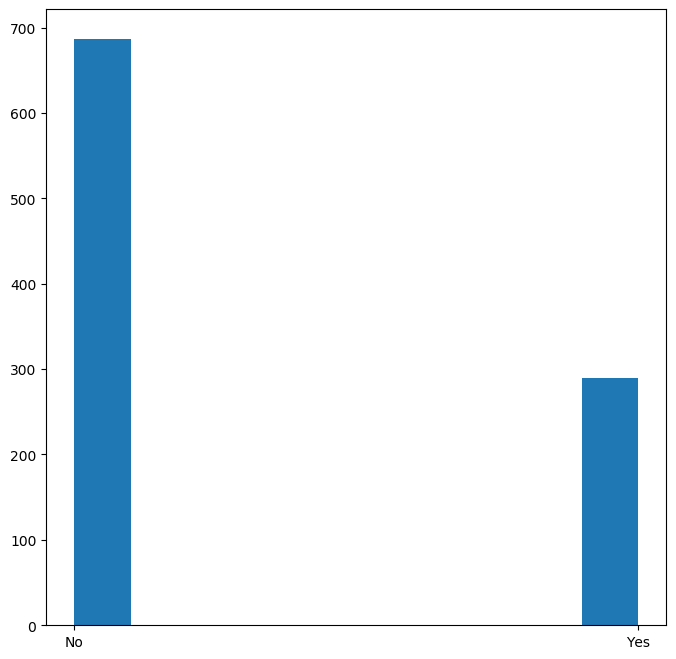

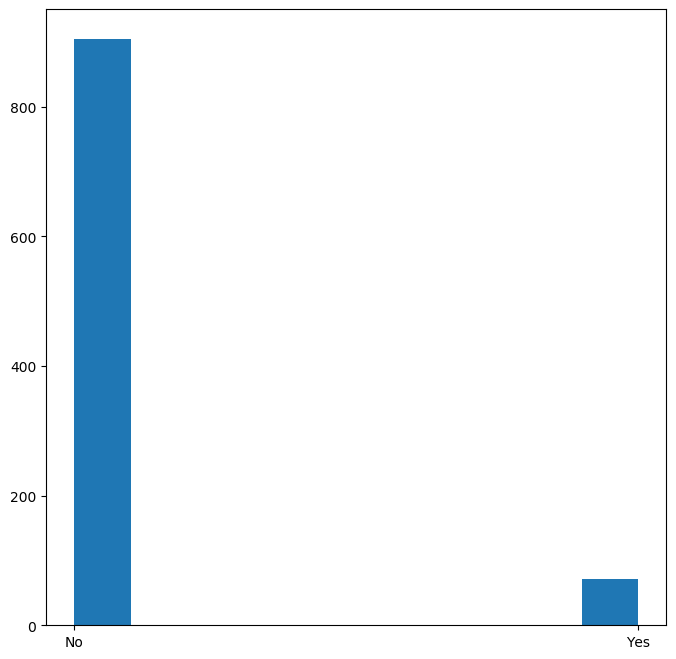

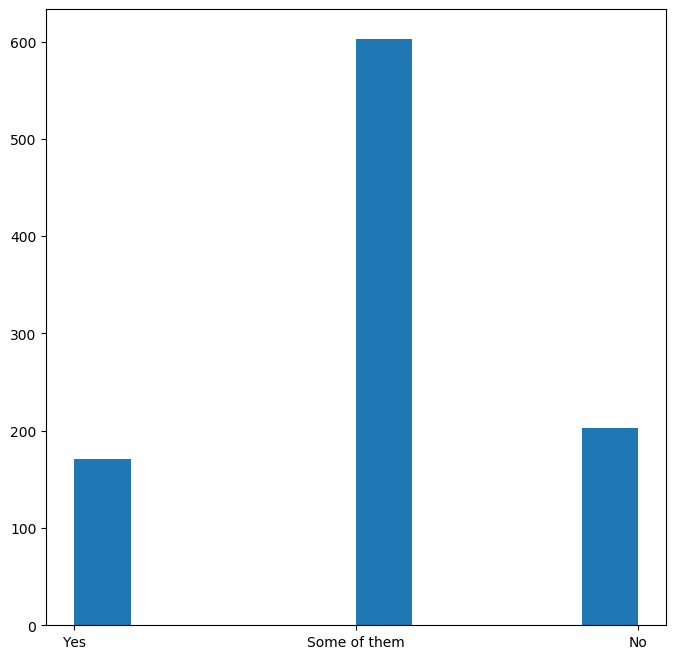

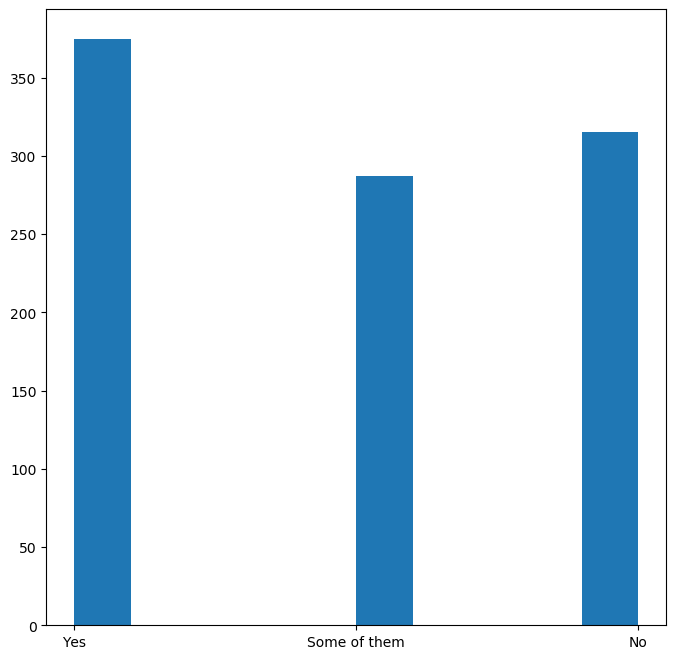

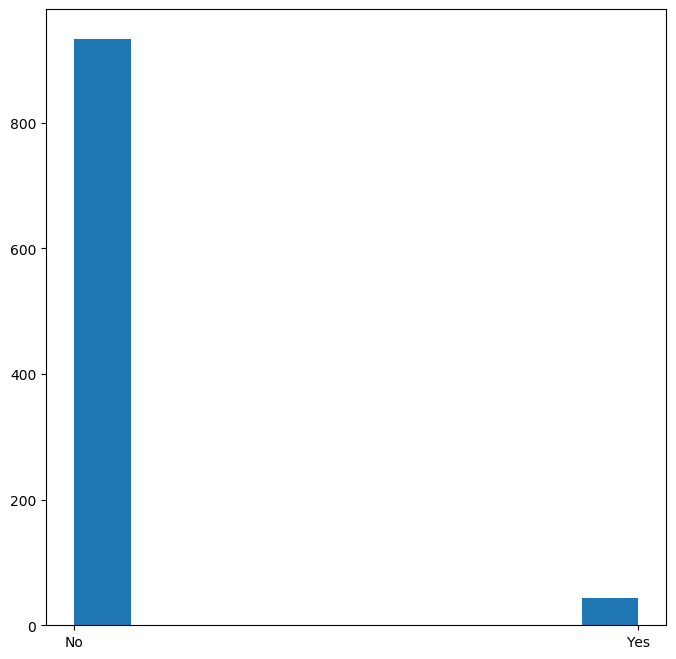

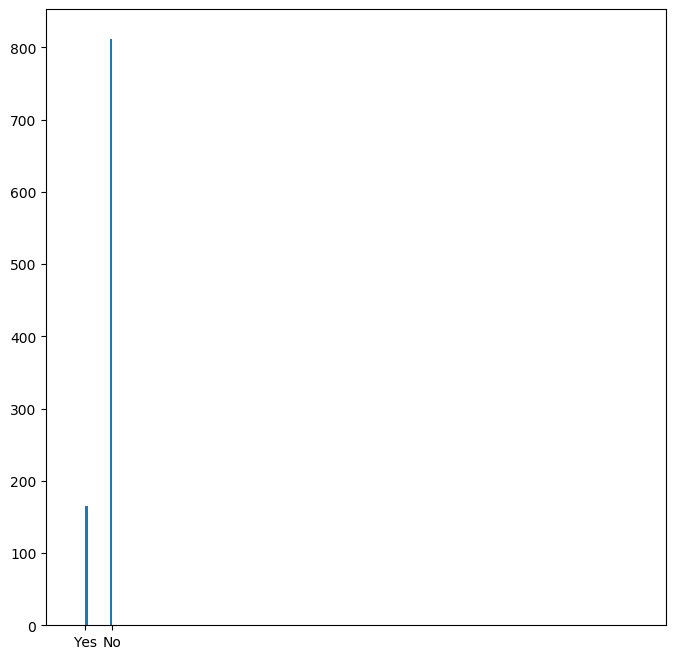

In [38]:

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Relevant features according to mutual information feature selection method

In [39]:
df2[['Age','family_history','no_employees','tech_company','leave','phys_health_consequence',
     'coworkers', 'supervisor','mental_health_interview','mental_vs_physical',
     'obs_consequence']]

,Age,family_history,no_employees,tech_company,leave,phys_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,46,Yes,5-Jan,Yes,Very easy,No,Yes,Yes,No,Yes,Yes
1,29,Yes,100-500,Yes,Somewhat difficult,No,Some of them,Some of them,No,No,No
2,31,No,5-Jan,Yes,Somewhat difficult,No,Some of them,Some of them,No,Yes,No
3,46,No,26-100,Yes,Don't know,No,Some of them,Yes,No,No,No
4,41,No,More than 1000,No,Don't know,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
972,29,Yes,100-500,Yes,Don't know,No,Some of them,No,No,No,No
973,36,Yes,More than 1000,No,Somewhat easy,Yes,Some of them,Some of them,No,No,No
974,32,Yes,26-100,Yes,Somewhat difficult,No,Some of them,Yes,No,Yes,No
975,34,Yes,More than 1000,Yes,Somewhat difficult,Yes,No,No,No,No,No


### Histograms of Mutual Information Features selected

In [40]:
plt.figure(figsize=(8,8))
df2['Age'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [41]:
plt.figure(figsize=(8,8))
df2['family_history'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [42]:
plt.figure(figsize=(8,8))
df2['no_employees'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [43]:
plt.figure(figsize=(8,8))
df2['tech_company'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [44]:
plt.figure(figsize=(8,8))
df2['leave'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [45]:
plt.figure(figsize=(8,8))
df2['phys_health_consequence'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [46]:
plt.figure(figsize=(8,8))
df2['coworkers'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [47]:
plt.figure(figsize=(8,8))
df2['supervisor'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [48]:
plt.figure(figsize=(8,8))
df2['mental_health_interview'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [49]:
plt.figure(figsize=(8,8))
df2['mental_vs_physical'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

In [50]:
plt.figure(figsize=(8,8))
df2['obs_consequence'].hist(grid = False)

<Figure size 800x800 with 0 Axes>

# Building Functions for easy model creation and summary extraction

3. Analyze the data using three different Machine Learning Algorithms to predict Mental Health Consequences.

In [51]:
# Creating a function to get the results summary from a model
def model_building(model,X_train_enc,y_train_enc,X_test_enc,y_test_enc):
    # fit the model
    model = model
    model.fit(X_train_enc, y_train_enc)
    # evaluate the model
    y_pred = model.predict(X_test_enc)

    # Creating ROC AUC curves
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test_enc))]
    # predict probabilities
    lr_probs = model.predict_proba(X_test_enc)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test_enc, ns_probs)
    lr_auc = roc_auc_score(y_test_enc, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test_enc, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test_enc, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    # evaluate predictions
    accuracy = accuracy_score(y_test_enc, y_pred)
    summary_model = ['Confusion Matrix',
                     pd.DataFrame(confusion_matrix(y_test_enc,y_pred)).transpose(),
                     'Classification Report',
                     pd.DataFrame(classification_report(y_test_enc,y_pred, output_dict = True)).transpose()]

    print('Accuracy: %.2f' % (accuracy*100))
    return summary_model, model

def summary_model(model_summary):
    for i in model_summary:
        print(i)
  

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


# Using only chi square features since only those can be used to apply the one hot encoding
X_train_chi = X_train[['no_employees', 'care_options', 'wellness_program', 'seek_help', 'leave',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview','mental_vs_physical', 'obs_consequence']]

X_test_chi = X_test[['no_employees', 'care_options', 'wellness_program', 'seek_help', 'leave',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview','mental_vs_physical', 'obs_consequence']]

# prepare input data
X_train_enc_chi = X_train_chi
X_test_enc_chi = X_test_chi

le = LabelEncoder()
for i in X_train_chi.columns:
    X_train_enc_chi[i] = le.fit_transform(X_train_chi[i])
    X_test_enc_chi[i] = le.fit_transform(X_test_chi[i])
        
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


ohe = OneHotEncoder() 
X_train_enc_ohe = ohe.fit_transform(X_train_enc_chi).toarray()
X_test_enc_ohe = ohe.fit_transform(X_test_enc_chi).toarray()

def model_building_OHE(model, X_train_enc, y_train_enc, X_test_enc, y_test_enc):
    model = model
    # Train Decision Tree Classifer
    model.fit(X_train_enc,y_train_enc)
    #Predict the response for test dataset
    y_pred = model.predict(X_test_enc)
    accuracy = accuracy_score(y_test_enc, y_pred)
    summary = ['Confusion Matrix',
                     pd.DataFrame(confusion_matrix(y_test_enc,y_pred)).transpose(),
                     'Classification Report',
                     pd.DataFrame(classification_report(y_test_enc,y_pred, output_dict = True)).transpose()]
    print('Accuracy: %.2f' % (accuracy*100))
    return summary, model

def Chi2_feature(X_train, y_train, X_test):
    # feature selection 
    fs = SelectKBest(score_func = chi2, k = 11)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs
X_train_fs_chi2, X_test_fs_chi2 = Chi2_feature(X_train, y_train, X_test)

def MutualInformation_feature(X_train, y_train, X_test):
    # feature selection 
    fs = SelectKBest(score_func = mutual_info_classif, k = 11)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs
X_train_fs_MI, X_test_fs_MI = MutualInformation_feature(X_train, y_train, X_test)



C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Fitting a logistic regression (LR) model with all features included

No Skill: ROC AUC=0.500
Model: ROC AUC=0.801


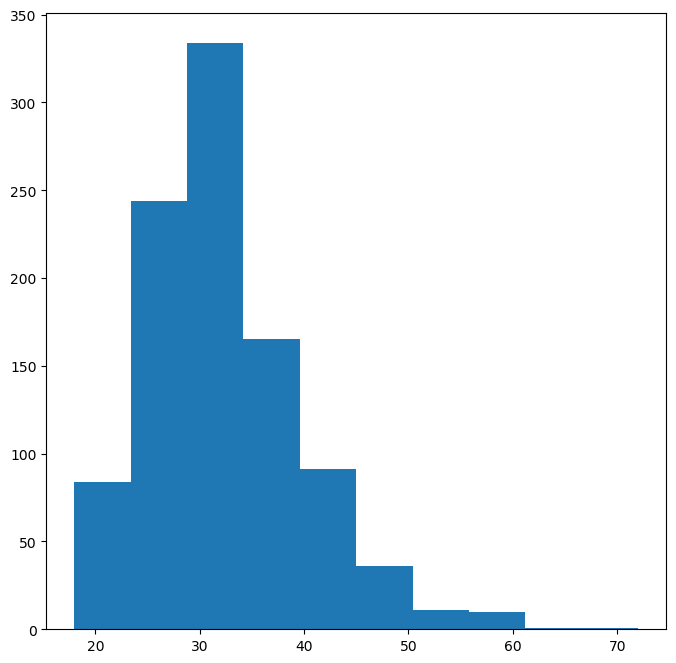

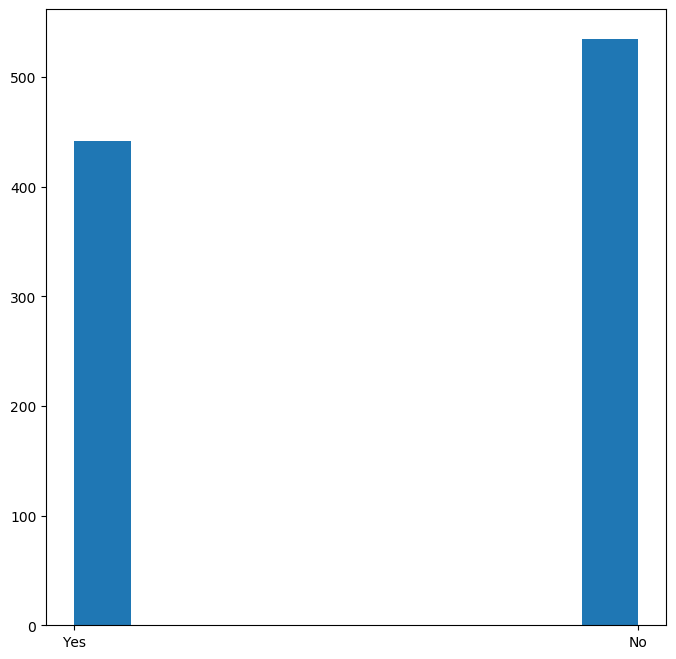

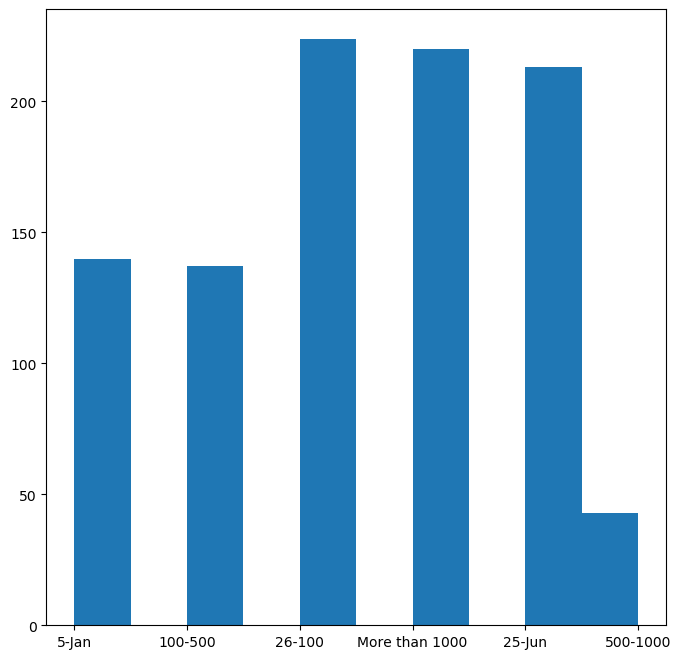

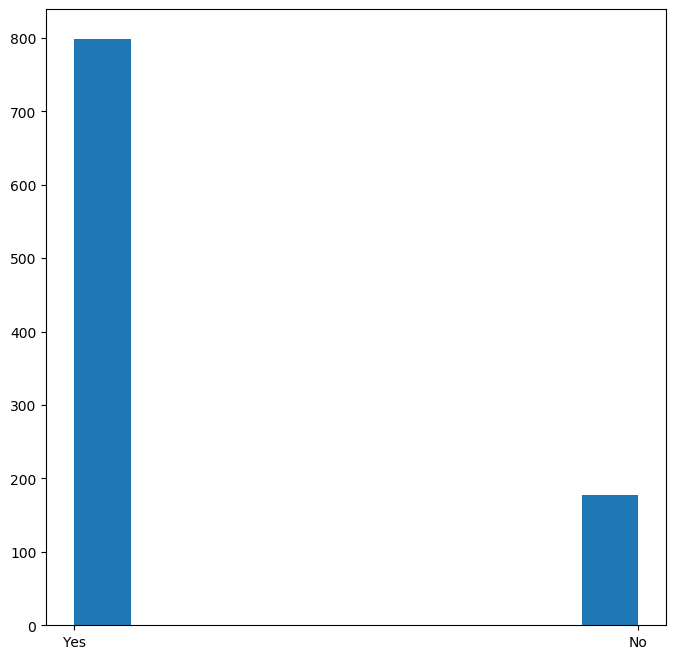

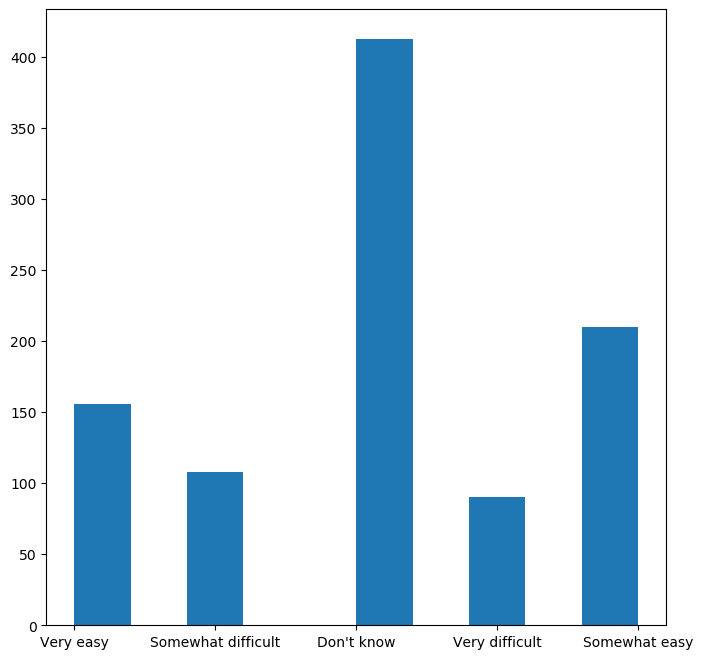

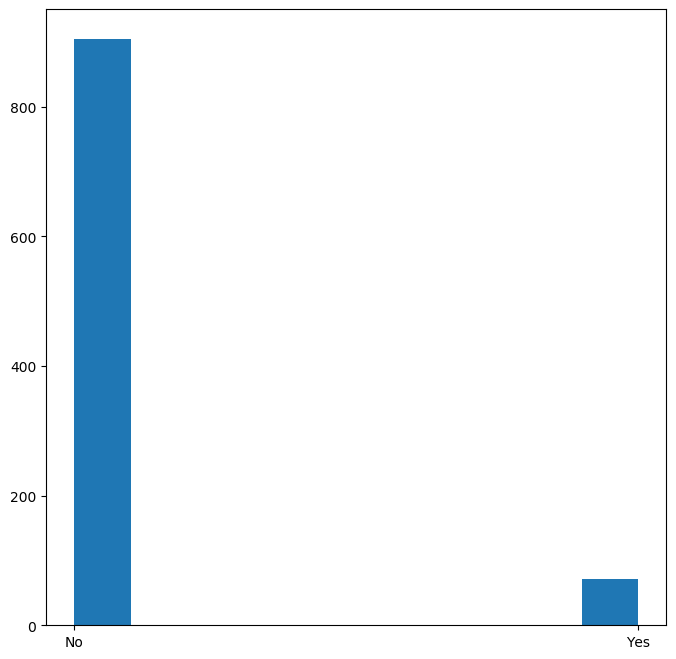

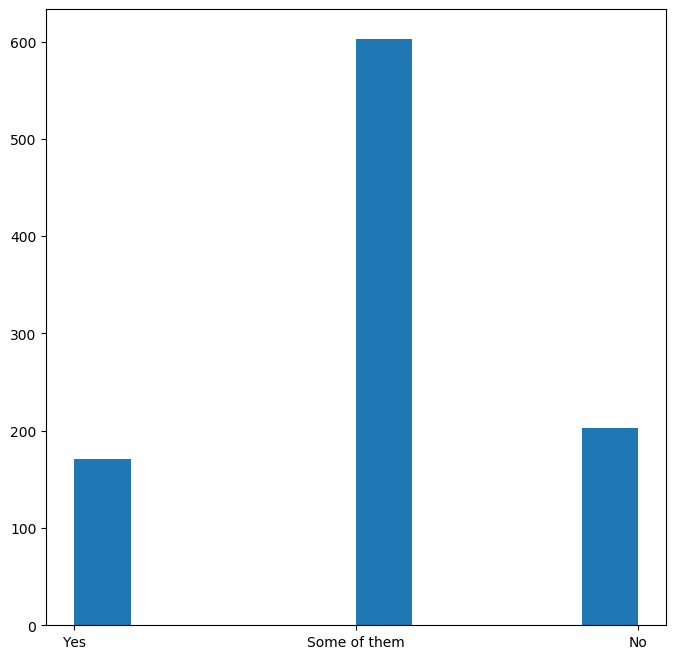

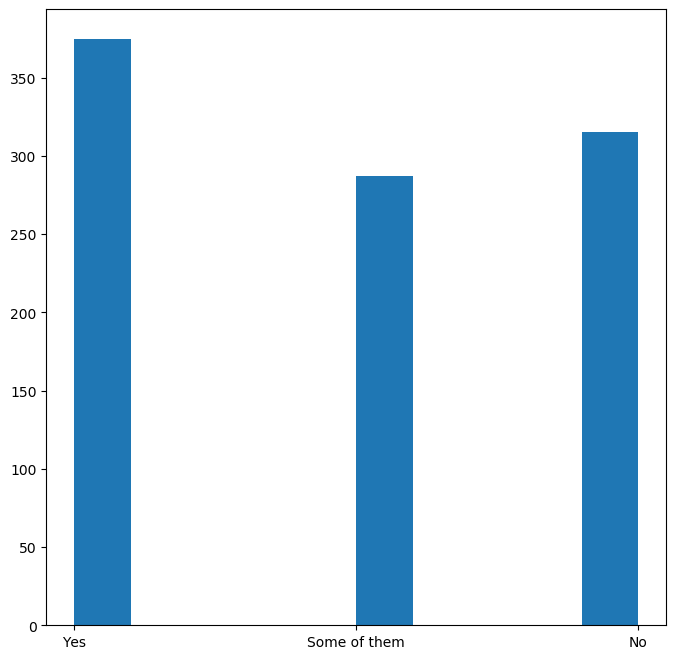

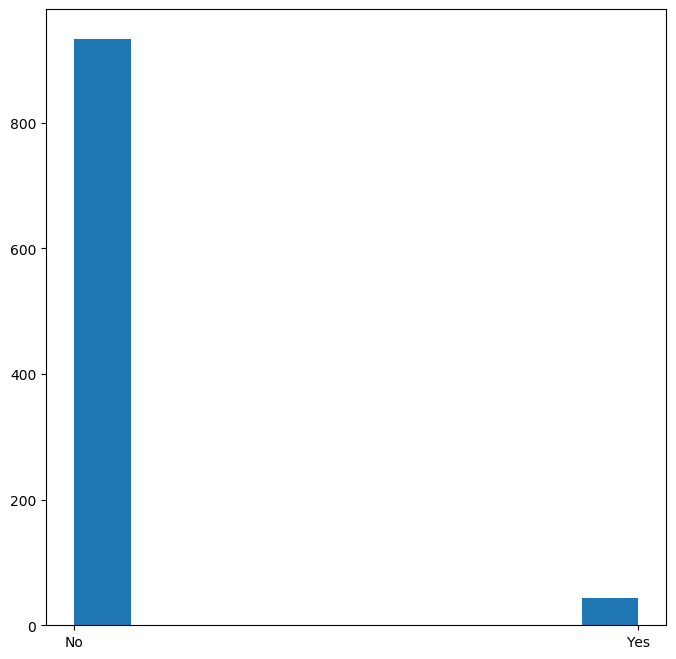

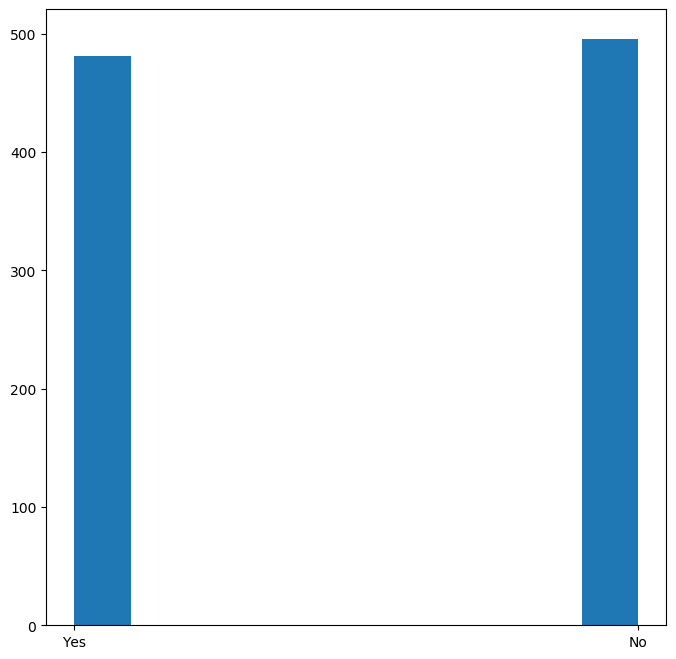

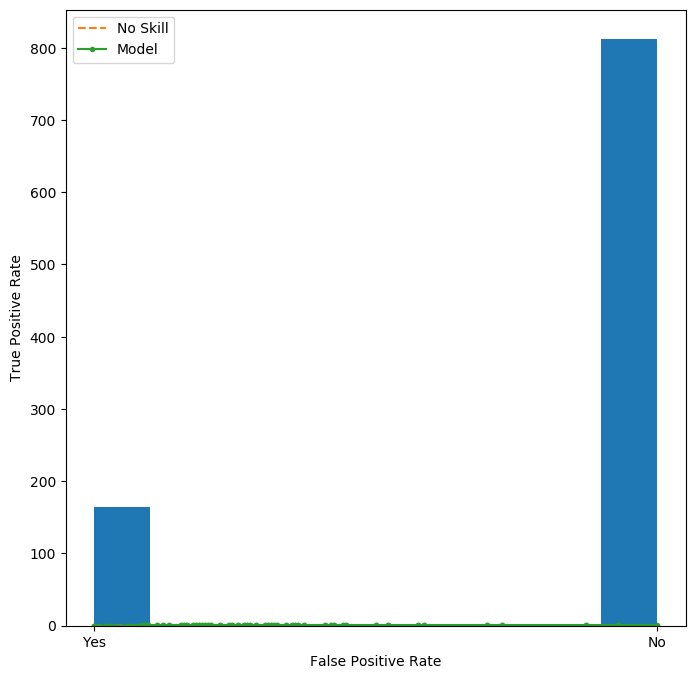

Accuracy: 72.76
LR_ALL
Confusion Matrix
     0   1
0  143  43
1   45  92
Classification Report
              precision    recall  f1-score     support
0              0.768817  0.760638  0.764706  188.000000
1              0.671533  0.681481  0.676471  135.000000
accuracy       0.727554  0.727554  0.727554    0.727554
macro avg      0.720175  0.721060  0.720588  323.000000
weighted avg   0.728157  0.727554  0.727827  323.000000


In [52]:
LR_ALL_summary, LR_ALL_model = model_building(LogisticRegression(solver='lbfgs'),X_train_enc,y_train_enc,X_test_enc,y_test_enc )
print("LR_ALL")
summary_model(LR_ALL_summary)

# Fitting a LR model using Chi-Square features

No Skill: ROC AUC=0.500
Model: ROC AUC=0.808


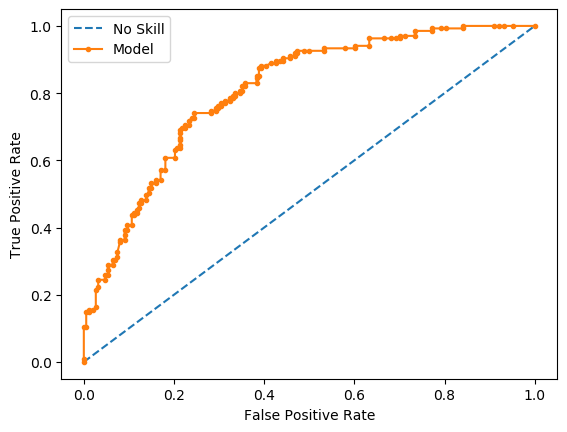

Accuracy: 74.61
LR_CHI
Confusion Matrix
     0   1
0  147  41
1   41  94
Classification Report
              precision    recall  f1-score    support
0              0.781915  0.781915  0.781915  188.00000
1              0.696296  0.696296  0.696296  135.00000
accuracy       0.746130  0.746130  0.746130    0.74613
macro avg      0.739106  0.739106  0.739106  323.00000
weighted avg   0.746130  0.746130  0.746130  323.00000


In [53]:
LR_CHI_summary, LR_CHI_model = model_building(LogisticRegression(solver='lbfgs'),X_train_fs_chi2,y_train_enc,X_test_fs_chi2,y_test_enc)
print("LR_CHI")
summary_model(LR_CHI_summary)

# Fitting a LR model using Mutual Information features 

No Skill: ROC AUC=0.500
Model: ROC AUC=0.810


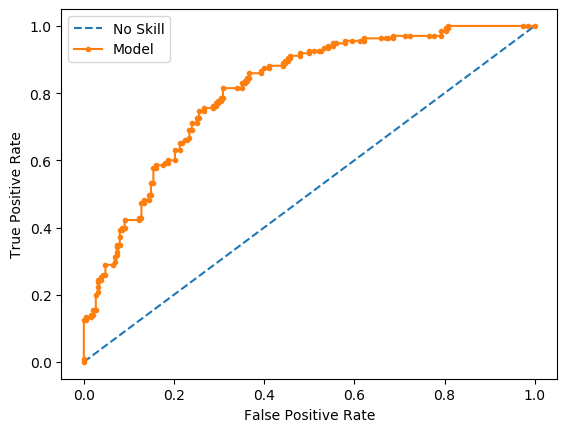

Accuracy: 73.99
LR_MI
Confusion Matrix
     0   1
0  143  39
1   45  96
Classification Report
              precision    recall  f1-score     support
0              0.785714  0.760638  0.772973  188.000000
1              0.680851  0.711111  0.695652  135.000000
accuracy       0.739938  0.739938  0.739938    0.739938
macro avg      0.733283  0.735875  0.734313  323.000000
weighted avg   0.741886  0.739938  0.740656  323.000000


In [54]:
LR_MI_summary, LR_MI_model = model_building(LogisticRegression(solver='lbfgs'),X_train_fs_MI,y_train_enc,X_test_fs_MI,y_test_enc)
print("LR_MI")
summary_model(LR_MI_summary)

# Fitting a Decision Tree (DT) model with all features included

No Skill: ROC AUC=0.500
Model: ROC AUC=0.619


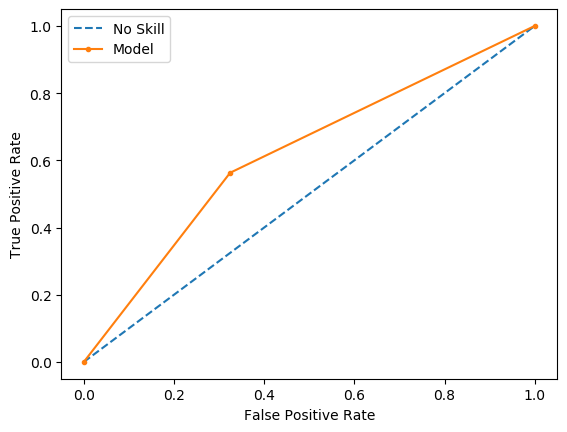

Accuracy: 62.85
DT_ALL
Confusion Matrix
     0   1
0  127  59
1   61  76
Classification Report
              precision    recall  f1-score     support
0              0.682796  0.675532  0.679144  188.000000
1              0.554745  0.562963  0.558824  135.000000
accuracy       0.628483  0.628483  0.628483    0.628483
macro avg      0.618770  0.619247  0.618984  323.000000
weighted avg   0.629276  0.628483  0.628855  323.000000


In [55]:
DT_ALL_summary, DT_ALL_model = model_building(DecisionTreeClassifier(),X_train_enc,y_train_enc,X_test_enc,y_test_enc )
print("DT_ALL")
summary_model(DT_ALL_summary)

# Fitting a DT model using Chi-Square features

No Skill: ROC AUC=0.500
Model: ROC AUC=0.666


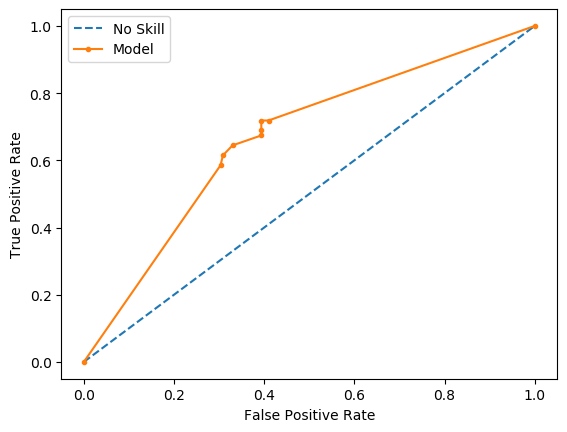

Accuracy: 65.94
DT_CHI
Confusion Matrix
     0   1
0  126  48
1   62  87
Classification Report
              precision    recall  f1-score     support
0              0.724138  0.670213  0.696133  188.000000
1              0.583893  0.644444  0.612676  135.000000
accuracy       0.659443  0.659443  0.659443    0.659443
macro avg      0.654015  0.657329  0.654404  323.000000
weighted avg   0.665521  0.659443  0.661251  323.000000


In [56]:
DT_CHI_summary, DT_CHI_model = model_building(DecisionTreeClassifier(),X_train_fs_chi2,y_train_enc,X_test_fs_chi2,y_test_enc)
print("DT_CHI")
summary_model(DT_CHI_summary)

# Fitting a DT model using Mutual Information features 

No Skill: ROC AUC=0.500
Model: ROC AUC=0.810


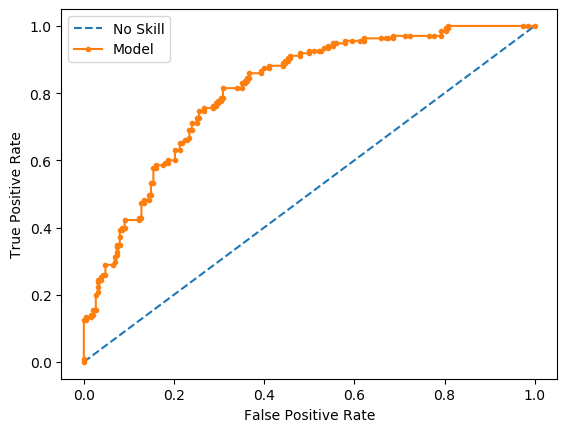

Accuracy: 73.99
DT_MI
Confusion Matrix
     0   1
0  143  39
1   45  96
Classification Report
              precision    recall  f1-score     support
0              0.785714  0.760638  0.772973  188.000000
1              0.680851  0.711111  0.695652  135.000000
accuracy       0.739938  0.739938  0.739938    0.739938
macro avg      0.733283  0.735875  0.734313  323.000000
weighted avg   0.741886  0.739938  0.740656  323.000000


In [57]:
DT_MI_summary, DT_MI_model = model_building(LogisticRegression(solver='lbfgs'),X_train_fs_MI,y_train_enc,X_test_fs_MI,y_test_enc)
print("DT_MI")
summary_model(DT_MI_summary)


# Fitting a Random Forest (RF) model with all features included

No Skill: ROC AUC=0.500
Model: ROC AUC=0.792


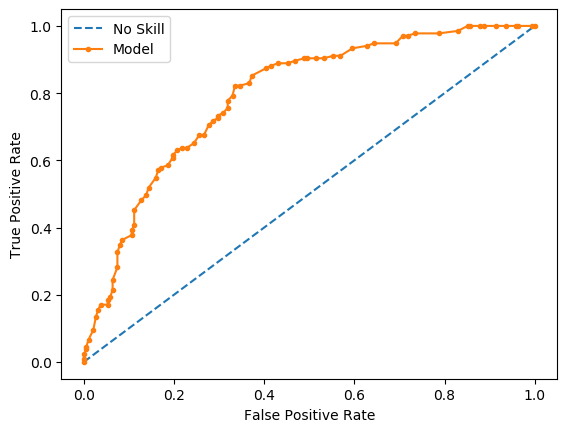

Accuracy: 70.90
RF_ALL
Confusion Matrix
     0   1
0  138  44
1   50  91
Classification Report
              precision    recall  f1-score     support
0              0.758242  0.734043  0.745946  188.000000
1              0.645390  0.674074  0.659420  135.000000
accuracy       0.708978  0.708978  0.708978    0.708978
macro avg      0.701816  0.704058  0.702683  323.000000
weighted avg   0.711075  0.708978  0.709782  323.000000


In [58]:
RF_ALL_summary, RF_ALL_model = model_building(RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt'),X_train_enc,y_train_enc,X_test_enc,y_test_enc )
print("RF_ALL")
summary_model(RF_ALL_summary)

# Fitting a RF model using Chi-Square features

No Skill: ROC AUC=0.500
Model: ROC AUC=0.740


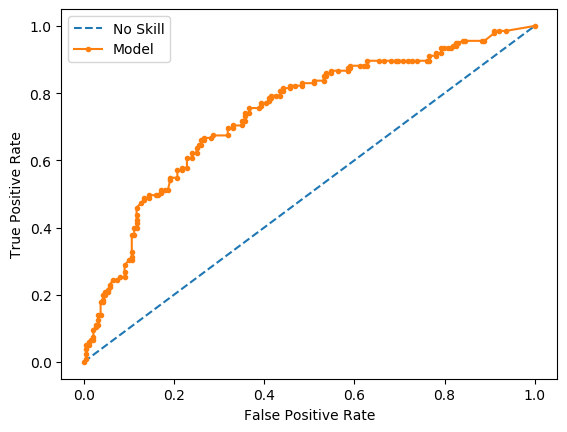

Accuracy: 68.11
RF_CHI
Confusion Matrix
     0   1
0  129  44
1   59  91
Classification Report
              precision    recall  f1-score     support
0              0.745665  0.686170  0.714681  188.000000
1              0.606667  0.674074  0.638596  135.000000
accuracy       0.681115  0.681115  0.681115    0.681115
macro avg      0.676166  0.680122  0.676639  323.000000
weighted avg   0.687570  0.681115  0.682881  323.000000


In [59]:
RF_CHI_summary, RF_CHI_model = model_building(RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt'),X_train_fs_chi2,y_train_enc,X_test_fs_chi2,y_test_enc)
print("RF_CHI")
summary_model(RF_CHI_summary)

# Fitting a RF model using Mutual Information features 

No Skill: ROC AUC=0.500
Model: ROC AUC=0.754


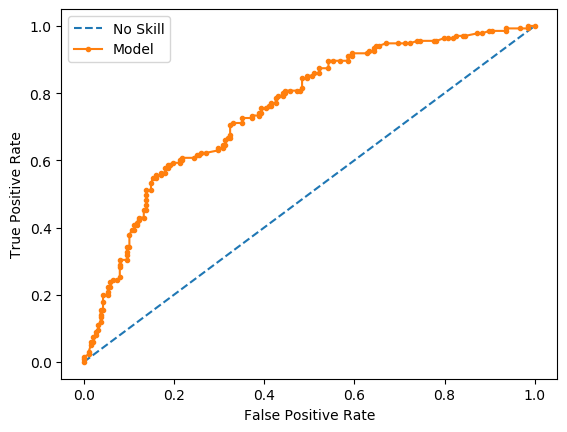

Accuracy: 68.11
RF_MI
Confusion Matrix
     0   1
0  127  42
1   61  93
Classification Report
              precision    recall  f1-score     support
0              0.751479  0.675532  0.711485  188.000000
1              0.603896  0.688889  0.643599  135.000000
accuracy       0.681115  0.681115  0.681115    0.681115
macro avg      0.677688  0.682210  0.677542  323.000000
weighted avg   0.689796  0.681115  0.683111  323.000000


In [60]:
RF_MI_summary, DT_MI_model = model_building(RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt'),X_train_fs_MI,y_train_enc,X_test_fs_MI,y_test_enc)
print("RF_MI")
summary_model(RF_MI_summary)

# Fitting a Support Vector Classifier (SVC) model to the one hot encoding with Chi square features included

In [61]:
SVC_OHE_summary, SVC_OHE_model = model_building_OHE(SVC(kernel = 'linear'),
                                                   X_train_enc_ohe,
                                                   y_train_enc,
                                                   X_test_enc_ohe,
                                                   y_test_enc)

print("SVC_CHI2_OHE")
summary_model(SVC_OHE_summary)

Accuracy: 72.45
SVC_CHI2_OHE
Confusion Matrix
     0   1
0  143  44
1   45  91
Classification Report
              precision    recall  f1-score     support
0              0.764706  0.760638  0.762667  188.000000
1              0.669118  0.674074  0.671587  135.000000
accuracy       0.724458  0.724458  0.724458    0.724458
macro avg      0.716912  0.717356  0.717127  323.000000
weighted avg   0.724754  0.724458  0.724599  323.000000


# Fitting a Neural Network (NN) to the one hot encoding model with Chi squaure features

In [62]:
NN_OHE_summary, NN_OHE_model = model_building_OHE(MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=1),
                                                   X_train_enc_ohe,
                                                   y_train_enc,
                                                   X_test_enc_ohe,
                                                   y_test_enc)

print("NN_CHI2_OHE")
summary_model(NN_OHE_summary)

Accuracy: 63.78
NN_CHI2_OHE
Confusion Matrix
     0   1
0  120  49
1   68  86
Classification Report
              precision    recall  f1-score     support
0              0.710059  0.638298  0.672269  188.000000
1              0.558442  0.637037  0.595156  135.000000
accuracy       0.637771  0.637771  0.637771    0.637771
macro avg      0.634250  0.637667  0.633712  323.000000
weighted avg   0.646690  0.637771  0.640039  323.000000


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Fitting a NN with all features included

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No Skill: ROC AUC=0.500
Model: ROC AUC=0.681


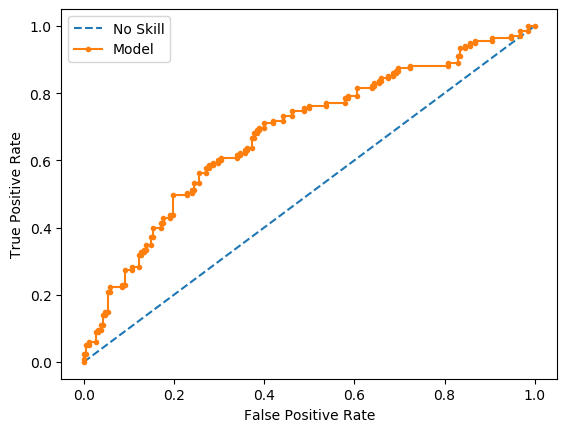

Accuracy: 65.94
NN_ALL
Confusion Matrix
     0   1
0  132  54
1   56  81
Classification Report
              precision    recall  f1-score     support
0              0.709677  0.702128  0.705882  188.000000
1              0.591241  0.600000  0.595588  135.000000
accuracy       0.659443  0.659443  0.659443    0.659443
macro avg      0.650459  0.651064  0.650735  323.000000
weighted avg   0.660176  0.659443  0.659784  323.000000


In [63]:
NN_ALL_summary, NN_ALL_model = model_building(MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=1),X_train_enc,y_train_enc,X_test_enc,y_test_enc )
print("NN_ALL")
summary_model(NN_ALL_summary)

# Fitting a NN with Chi square features included

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No Skill: ROC AUC=0.500
Model: ROC AUC=0.747


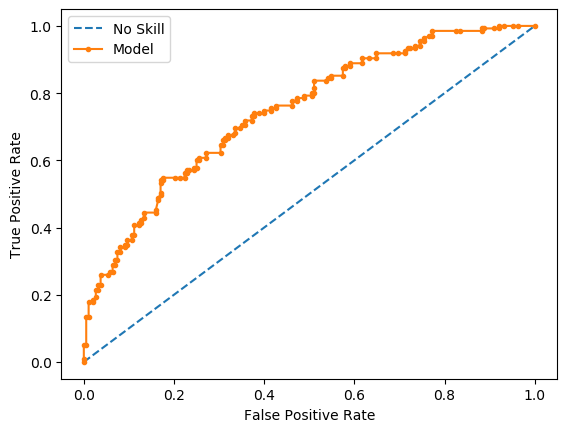

Accuracy: 67.18
NN_CHI
Confusion Matrix
     0   1
0  125  43
1   63  92
Classification Report
              precision    recall  f1-score     support
0              0.744048  0.664894  0.702247  188.000000
1              0.593548  0.681481  0.634483  135.000000
accuracy       0.671827  0.671827  0.671827    0.671827
macro avg      0.668798  0.673188  0.668365  323.000000
weighted avg   0.681145  0.671827  0.673925  323.000000


In [64]:
NN_CHI_summary, NN_CHI_model = model_building(MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=1),X_train_fs_chi2,y_train_enc,X_test_fs_chi2,y_test_enc)
print("NN_CHI")
summary_model(NN_CHI_summary)

# Fitting a NN with Mutual Information features included

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No Skill: ROC AUC=0.500
Model: ROC AUC=0.719


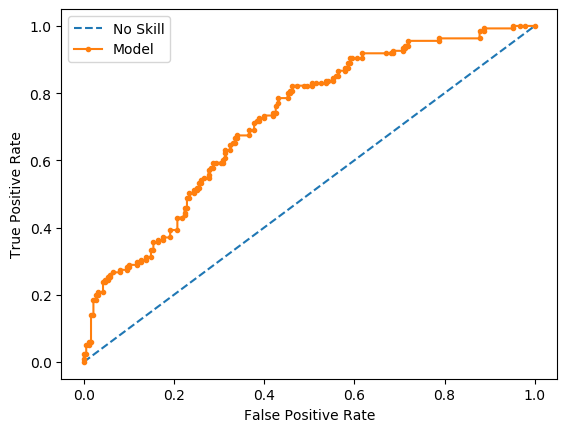

Accuracy: 65.94
NN_MI
Confusion Matrix
     0   1
0  116  38
1   72  97
Classification Report
              precision    recall  f1-score     support
0              0.753247  0.617021  0.678363  188.000000
1              0.573964  0.718519  0.638158  135.000000
accuracy       0.659443  0.659443  0.659443    0.659443
macro avg      0.663606  0.667770  0.658260  323.000000
weighted avg   0.678315  0.659443  0.661559  323.000000


In [65]:
NN_MI_summary, NN_MI_model = model_building(MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=1),X_train_fs_MI,y_train_enc,X_test_fs_MI,y_test_enc)
print("NN_MI")
summary_model(NN_MI_summary)

# Fitting a Naive Bayes (NB) model with all features included

No Skill: ROC AUC=0.500
Model: ROC AUC=0.808


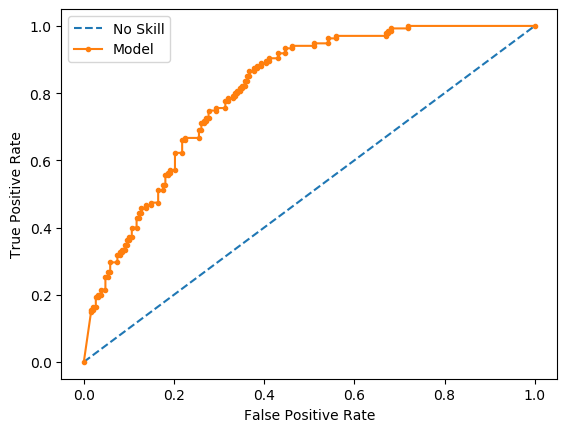

Accuracy: 73.07
NB_ALL
Confusion Matrix
     0   1
0  146  45
1   42  90
Classification Report
              precision    recall  f1-score    support
0              0.764398  0.776596  0.770449  188.00000
1              0.681818  0.666667  0.674157  135.00000
accuracy       0.730650  0.730650  0.730650    0.73065
macro avg      0.723108  0.721631  0.722303  323.00000
weighted avg   0.729883  0.730650  0.730203  323.00000


In [66]:
NB_ALL_summary, NB_ALL_model = model_building(GaussianNB(),X_train_enc,y_train_enc,X_test_enc,y_test_enc )
print("NB_ALL")
summary_model(NB_ALL_summary)

# Fitting a NB model with Chi square features included

No Skill: ROC AUC=0.500
Model: ROC AUC=0.805


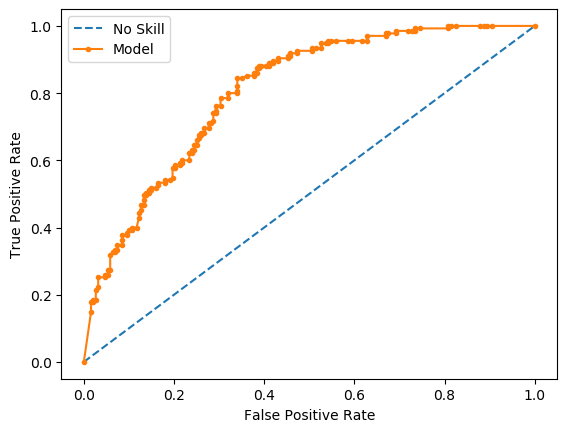

Accuracy: 70.28
NB_CHI
Confusion Matrix
     0   1
0  144  52
1   44  83
Classification Report
              precision    recall  f1-score     support
0              0.734694  0.765957  0.750000  188.000000
1              0.653543  0.614815  0.633588  135.000000
accuracy       0.702786  0.702786  0.702786    0.702786
macro avg      0.694119  0.690386  0.691794  323.000000
weighted avg   0.700776  0.702786  0.701345  323.000000


In [67]:
NB_CHI_summary, NB_CHI_model = model_building(GaussianNB(),X_train_fs_chi2,y_train_enc,X_test_fs_chi2,y_test_enc)
print("NB_CHI")
summary_model(NB_CHI_summary)

# Fitting a NB model with Mutual Information features included

No Skill: ROC AUC=0.500
Model: ROC AUC=0.801


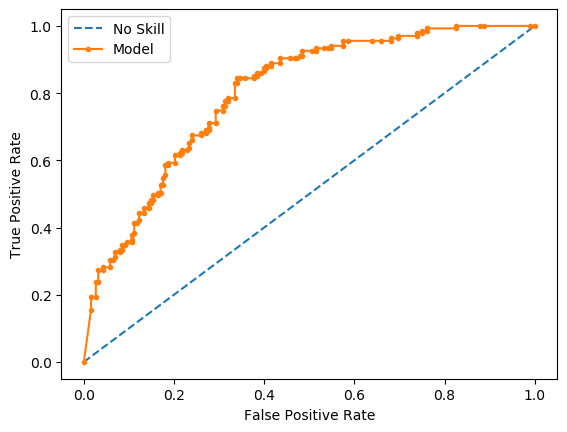

Accuracy: 71.52
NB_MI
Confusion Matrix
     0   1
0  154  58
1   34  77
Classification Report
              precision    recall  f1-score    support
0              0.726415  0.819149  0.770000  188.00000
1              0.693694  0.570370  0.626016  135.00000
accuracy       0.715170  0.715170  0.715170    0.71517
macro avg      0.710054  0.694760  0.698008  323.00000
weighted avg   0.712739  0.715170  0.709821  323.00000


In [68]:
NB_MI_summary, NB_MI_model = model_building(GaussianNB(),X_train_fs_MI,y_train_enc,X_test_fs_MI,y_test_enc)
print("NB_MI")
summary_model(NB_MI_summary)

# Cross fold validation and Boxplots of accuracy to measure error rate

4.	Create a boxplot comparing the error from the three ML Algorithms you tested.


6.	Choosing the “best” ML algorithm from #5, perform a sensitivity analysis on the effects of training % vs. testing %.

## Models with all features included

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR_ALL: 0.730839 (0.038440)
DT_ALL: 0.657459 (0.070723)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF_ALL: 0.723124 (0.033319)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https

NN_ALL: 0.665058 (0.045216)
NB_ALL: 0.739837 (0.044087)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Text(0.5, 1.0, 'Algorithm Comparison')

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a629540d88>,
 'caps': [<matplotlib.lines.Line2D at 0x1a629602ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a629602108>,
 'medians': [<matplotlib.lines.Line2D at 0x1a629606e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a629606f48>,
 'means': []}

[Text(0, 0, 'LR_ALL'),
 Text(0, 0, 'DT_ALL'),
 Text(0, 0, 'RF_ALL'),
 Text(0, 0, 'NN_ALL'),
 Text(0, 0, 'NB_ALL')]

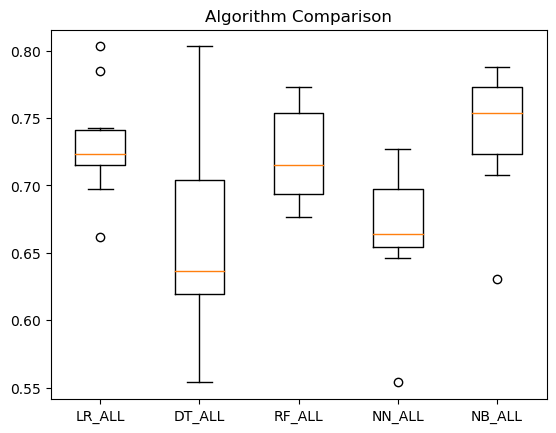

In [69]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR_ALL', LogisticRegression(solver='lbfgs')))
models.append(('DT_ALL', DecisionTreeClassifier()))
models.append(('RF_ALL', RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')))
models.append(('NN_ALL', MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=1)))
models.append(('NB_ALL', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_enc, y_train_enc, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
plt.title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Models with Chi Square Features included

SelectKBest(k=11, score_func=<function chi2 at 0x000001A6210A0048>)

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR_CHI: 0.735338 (0.044953)
DT_CHI: 0.663380 (0.070859)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF_CHI: 0.704779 (0.038805)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https

NN_CHI: 0.700023 (0.063109)
NB_CHI: 0.741492 (0.034403)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Text(0.5, 1.0, 'Algorithm Comparison')

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a62a7c32c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a62a65bbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a62a7cbf88>,
 'medians': [<matplotlib.lines.Line2D at 0x1a62a65cf48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a62a7ab608>,
 'means': []}

[Text(0, 0, 'LR_CHI'),
 Text(0, 0, 'DT_CHI'),
 Text(0, 0, 'RF_CHI'),
 Text(0, 0, 'NN_CHI'),
 Text(0, 0, 'NB_CHI')]

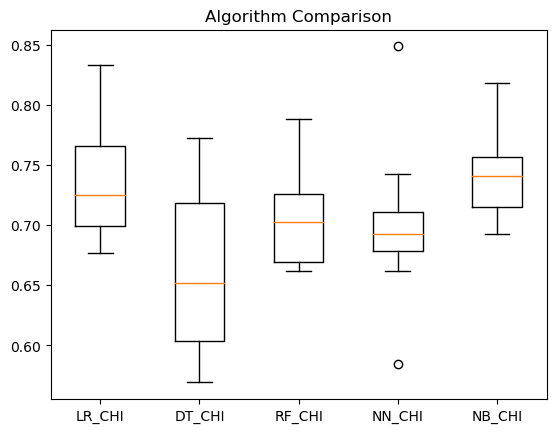

In [70]:

fs = SelectKBest(score_func = chi2, k = 11)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR_CHI', LogisticRegression(solver='lbfgs')))
models.append(('DT_CHI', DecisionTreeClassifier()))
models.append(('RF_CHI', RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')))
models.append(('NN_CHI', MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=1)))
models.append(('NB_CHI', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_fs, y_train_enc, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
plt.title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Models with Mutual Information Features included

SelectKBest(k=11,
            score_func=<function mutual_info_classif at 0x000001A6212DB0D8>)

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR_MI: 0.750653 (0.051132)
DT_MI: 0.674172 (0.062183)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF_MI: 0.712378 (0.047717)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https

NN_MI: 0.698788 (0.042588)
NB_MI: 0.726084 (0.040270)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Text(0.5, 1.0, 'Algorithm Comparison')

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a62a6f2808>,
 'caps': [<matplotlib.lines.Line2D at 0x1a62a724208>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a62a720548>,
 'medians': [<matplotlib.lines.Line2D at 0x1a62a72ad08>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a62a70bac8>,
 'means': []}

[Text(0, 0, 'LR_MI'),
 Text(0, 0, 'DT_MI'),
 Text(0, 0, 'RF_MI'),
 Text(0, 0, 'NN_MI'),
 Text(0, 0, 'NB_MI')]

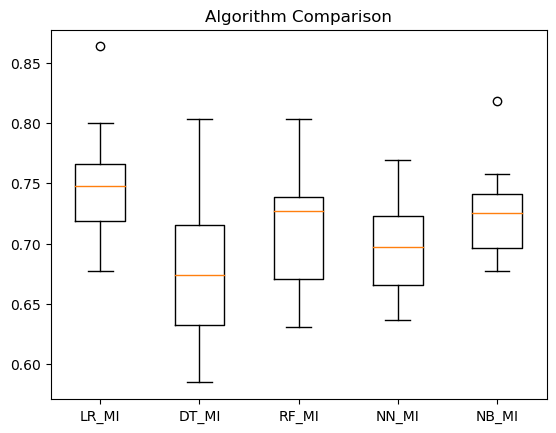

In [71]:

fs = SelectKBest(score_func = mutual_info_classif, k = 11)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR_MI', LogisticRegression(solver='lbfgs')))
models.append(('DT_MI', DecisionTreeClassifier()))
models.append(('RF_MI', RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')))
models.append(('NN_MI', MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=1)))
models.append(('NB_MI', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_fs, y_train_enc, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
plt.title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [72]:
# Creating encoding for SVM classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


# Using only chi square features since only those can be used to apply the one hot encoding
X_train = X_train[['no_employees', 'care_options', 'wellness_program', 'seek_help', 'leave',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview','mental_vs_physical', 'obs_consequence']]

X_test = X_test[['no_employees', 'care_options', 'wellness_program', 'seek_help', 'leave',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview','mental_vs_physical', 'obs_consequence']]

# prepare input data
X_train_enc = X_train
X_test_enc = X_test

le = LabelEncoder()
for i in X_train.columns:
    X_train_enc[i] = le.fit_transform(X_train[i])
    X_test_enc[i] = le.fit_transform(X_test[i])
        
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


ohe = OneHotEncoder() 
X_train_enc = ohe.fit_transform(X_train_enc).toarray()
X_test_enc = ohe.fit_transform(X_test_enc).toarray()


Train (654, 21) (654,)
Test (323, 21) (323,)


## Models that used one hot encoding

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC_OHE: 0.750653 (0.051132)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
S

NN_OHE: 0.698788 (0.042588)


C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0.5, 1.0, 'Algorithm Comparison')

C:\Users\Abdul Najeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a62a7e6608>,
 'caps': [<matplotlib.lines.Line2D at 0x1a62a7e6d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a62a7dce48>,
 'medians': [<matplotlib.lines.Line2D at 0x1a62a7e5f08>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a62a93e788>,
 'means': []}

[Text(0, 0, 'SVC_OHE'), Text(0, 0, 'NN_OHE')]

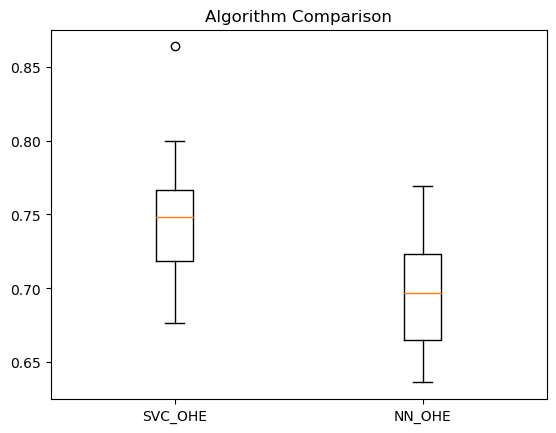

In [73]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('SVC_OHE', LogisticRegression(solver='lbfgs')))
models.append(('NN_OHE', MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=1)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_fs, y_train_enc, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
plt.title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Choosing top three algorithms and sumarizing accuracy score, confusion matrix, and classification report for each

5.	Make a summary results table showing the accuracy score, confusion matrix, and classification report for the methods compared.

Creating a summary report only for the top 3 best algorithms from the above results

In [74]:
print('Creating a summary report only for the top 3 best algorithms from the above results')
print('NB_MI_summary')
for i in range(4):
    NB_MI_summary[i]
print("LR_MI_summary")
for i in range(4):
    LR_MI_summary[i]
print('SVC_OHE_summary')
for i in range(4):
    SVC_OHE_summary[i]


Creating a summary report only for the top 3 best algorithms from the above results
NB_MI_summary


'Confusion Matrix'

,0,1
0,154,58
1,34,77


'Classification Report'

,precision,recall,f1-score,support
0,0.726415,0.819149,0.770000,188.00000
1,0.693694,0.570370,0.626016,135.00000
accuracy,0.715170,0.715170,0.715170,0.71517
macro avg,0.710054,0.694760,0.698008,323.00000
weighted avg,0.712739,0.715170,0.709821,323.00000


LR_MI_summary


'Confusion Matrix'

,0,1
0,143,39
1,45,96


'Classification Report'

,precision,recall,f1-score,support
0,0.785714,0.760638,0.772973,188.000000
1,0.680851,0.711111,0.695652,135.000000
accuracy,0.739938,0.739938,0.739938,0.739938
macro avg,0.733283,0.735875,0.734313,323.000000
weighted avg,0.741886,0.739938,0.740656,323.000000


SVC_OHE_summary


'Confusion Matrix'

,0,1
0,143,44
1,45,91


'Classification Report'

,precision,recall,f1-score,support
0,0.764706,0.760638,0.762667,188.000000
1,0.669118,0.674074,0.671587,135.000000
accuracy,0.724458,0.724458,0.724458,0.724458
macro avg,0.716912,0.717356,0.717127,323.000000
weighted avg,0.724754,0.724458,0.724599,323.000000


    # Creating the dataframe with 10 random instances for the features selected by Mutual Information method.

7.	Randomly create 10 instances based on the features used in the model, then use the model to predict Mental Health Consequence using the best ML algorithm obtained from #5.

In [75]:
df = pd.DataFrame(columns=['Age','family_history','no_employees','tech_company','leave','phys_health_consequence',
     'coworkers', 'supervisor','mental_health_interview','mental_vs_physical',
     'obs_consequence'])

for i in range(10):
    df = df.append({'Age': np.random.choice(df2['Age'].unique()),
                   'family_history': np.random.choice(df2['family_history'].unique()),
                   'no_employees': np.random.choice(df2['no_employees'].unique()),
                   'tech_company': np.random.choice(df2['tech_company'].unique()),
                    'leave': np.random.choice(df2['leave'].unique()),
                    'phys_health_consequence': np.random.choice(df2['phys_health_consequence'].unique()),
                    'coworkers': np.random.choice(df2['coworkers'].unique()),
                    'supervisor': np.random.choice(df2['supervisor'].unique()),
                    'mental_health_interview': np.random.choice(df2['mental_health_interview'].unique()),
                    'mental_vs_physical': np.random.choice(df2['mental_vs_physical'].unique()),
                    'obs_consequence': np.random.choice(df2['obs_consequence'].unique())}, 
                   ignore_index=True)
print("10 instances generated at random dataframe")
df


10 instances generated at random dataframe


,Age,family_history,no_employees,tech_company,leave,phys_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,72,Yes,5-Jan,Yes,Somewhat difficult,Yes,Some of them,Yes,Yes,Yes,Yes
1,53,No,More than 1000,No,Very difficult,No,Yes,Yes,No,No,No
2,62,Yes,5-Jan,No,Very difficult,No,No,Yes,Yes,Yes,No
3,50,Yes,5-Jan,No,Somewhat difficult,Yes,No,No,Yes,No,Yes
4,31,Yes,26-100,Yes,Very easy,Yes,Some of them,Some of them,No,No,Yes
5,29,Yes,500-1000,Yes,Very easy,Yes,Yes,No,No,No,Yes
6,60,Yes,More than 1000,Yes,Very easy,No,Some of them,No,No,No,Yes
7,50,No,5-Jan,Yes,Very difficult,No,Some of them,Yes,Yes,Yes,No
8,33,Yes,25-Jun,No,Very difficult,No,Yes,Yes,No,Yes,No
9,27,No,500-1000,No,Very difficult,No,Yes,Yes,No,No,No


## Encoding newly created 10 instance random dataframe

In [76]:
# Encoding the newly created dataframe so that it can be used in the model
# Encoding age column
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df = df.astype(str)
# ENcoding all other columns
df_enc = df
le = LabelEncoder()
for i in df.columns:
    if i!= "Age":
        df_enc[i] = le.fit_transform(df[i])




## Making prediction on the 10 instance random dataframe

In [77]:
# Making prediction on the 10 instance random dataframe
predictions = LR_MI_model.predict(df_enc)
predictions
df['Predictions'] = predictions
df.loc[df['Predictions'] == 1, 'Predictions'] = "Yes"
df.loc[df['Predictions'] == 0, 'Predictions'] = "No"
print('New Column Predictions has been attached to the dataframe')
df


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

New Column Predictions has been attached to the dataframe


,Age,family_history,no_employees,tech_company,leave,phys_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,Predictions
0,1.0,1,2,1,0,1,1,2,1,1,1,Yes
1,0.5777777777777778,0,4,0,1,0,2,2,0,0,0,Yes
2,0.7777777777777778,1,2,0,1,0,0,2,1,1,0,Yes
3,0.5111111111111112,1,2,0,0,1,0,0,1,0,1,Yes
4,0.0888888888888889,1,1,1,2,1,1,1,0,0,1,Yes
5,0.04444444444444451,1,3,1,2,1,2,0,0,0,1,Yes
6,0.7333333333333335,1,4,1,2,0,1,0,0,0,1,Yes
7,0.5111111111111112,0,2,1,1,0,1,2,1,1,0,Yes
8,0.13333333333333341,1,0,0,1,0,2,2,0,1,0,Yes
9,0.0,0,3,0,1,0,2,2,0,0,0,Yes
